# **💭 Cognitive Distortion Classification - Multiclass Classification Using TensorFlow**

This notebook shows the steps to building a multi-class text classifier to classify different cognitive distortions using TensorFlow and TensorFlow Hub.

### **1) Problem**

Identifying the dominant cognitive distortion based on a piece of text from patient-therapist interactions (out of 10 possible cognitive dictortions and a 'no distortion' class).

### **2) Data**

The dataset can be found on Kaggle (Cognitive Distortion detection dataset): https://www.kaggle.com/datasets/sagarikashreevastava/cognitive-distortion-detetction-dataset



### **3) Evaluation**

The classifier is evaluated on multi class accuracy, precision, recall, f1 score and loss. The final result of this project is a classifier that is able to accurately predict the dominant distortion or lack of distortion in a piece of text with high accuracy.

### **4) Features**

*Some information about the data:*
* Text data (unstructured data) -> Deep Learning/Transfer Learning solutions
* 10 + 1 different classes (10 cognitive distortions + 'no distortion')
* ~2500+ unique records (text) in the original dataset
* The features of the dataset include the 'ID_number', 'Patient Question', 'Distorted part', 'Dominant Distortion' and 'Secondary distortion (Optional)' columns. I will use the `Patient Question` and `Dominant Distortion` columns combined to build this classifier.

*Description of the different type of distortions can be found on Kaggle: https://www.kaggle.com/datasets/sagarikashreevastava/cognitive-distortion-detetction-dataset?select=Annotated_data.csv*

*The possible distortion types are ('dominant_distortion'):*

* Mind reading
* Overgeneralization
* Magnification
* Labeling
* Personalization
* Fortune telling
* Emotional reasoning
* Mental filter
* Should statements
* All-or-nothing thinking
* No distortion

##**Data Transformation and Preprocessing**

### **Data Cleaning**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
sns.set_style("whitegrid")
sns.set_palette("Paired")

In [ ]:
sns.color_palette()

[(0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
 (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 (0.2, 0.6274509803921569, 0.17254901960784313),
 (0.984313725490196, 0.6039215686274509, 0.6),
 (0.8901960784313725, 0.10196078431372549, 0.10980392156862745),
 (0.9921568627450981, 0.7490196078431373, 0.43529411764705883),
 (1.0, 0.4980392156862745, 0.0),
 (0.792156862745098, 0.6980392156862745, 0.8392156862745098),
 (0.41568627450980394, 0.23921568627450981, 0.6039215686274509),
 (1.0, 1.0, 0.6),
 (0.6941176470588235, 0.34901960784313724, 0.1568627450980392)]

In [ ]:
palette = sns.color_palette()

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Practica/cognitive_distortions.csv')
df.head()

,Id_Number,Patient Question,Distorted part,Dominant Distortion,Secondary Distortion (Optional)
0,4500,"Hello, I have a beautiful,smart,outgoing and a...",The voice are always fimilar (someone she know...,Personalization,NaN
1,4501,Since I was about 16 years old I’ve had these ...,I feel trapped inside my disgusting self and l...,Labeling,Emotional Reasoning
2,4502,So I’ve been dating on and off this guy for a...,NaN,No Distortion,NaN
3,4503,My parents got divorced in 2004. My mother has...,NaN,No Distortion,NaN
4,4504,I don’t really know how to explain the situati...,I refused to go because I didn’t know if it wa...,Fortune-telling,Emotional Reasoning


In [ ]:
df.shape

(2530, 5)

**Renaming columns and distortion types**

In [ ]:
df.rename(columns={'Id_Number': 'id', 'Patient Question': 'patient_question', 'Distorted part': 'distorted_part',
                   'Dominant Distortion': 'dominant_distortion', 'Secondary Distortion (Optional)': 'secondary_distortion'}, inplace=True)
df.head()

,id,patient_question,distorted_part,dominant_distortion,secondary_distortion
0,4500,"Hello, I have a beautiful,smart,outgoing and a...",The voice are always fimilar (someone she know...,Personalization,NaN
1,4501,Since I was about 16 years old I’ve had these ...,I feel trapped inside my disgusting self and l...,Labeling,Emotional Reasoning
2,4502,So I’ve been dating on and off this guy for a...,NaN,No Distortion,NaN
3,4503,My parents got divorced in 2004. My mother has...,NaN,No Distortion,NaN
4,4504,I don’t really know how to explain the situati...,I refused to go because I didn’t know if it wa...,Fortune-telling,Emotional Reasoning


In [ ]:
df['dominant_distortion'] = df['dominant_distortion'].replace({
    'No Distortion': 'No distortion',
    'Mind Reading': 'Mind reading',
    'Overgeneralization': 'Overgeneralization',
    'Magnification': 'Magnification',
    'Labeling': 'Labeling',
    'Personalization': 'Personalization',
    'Fortune-telling': 'Fortune telling',
    'Emotional Reasoning': 'Emotional reasoning',
    'Mental filter': 'Mental filter',
    'Should statements': 'Should statements',
    'All-or-nothing thinking ': 'All-or-nothing thinking'})

In [ ]:
df.head(10)

,id,patient_question,distorted_part,dominant_distortion,secondary_distortion
0,4500,"Hello, I have a beautiful,smart,outgoing and a...",The voice are always fimilar (someone she know...,Personalization,NaN
1,4501,Since I was about 16 years old I’ve had these ...,I feel trapped inside my disgusting self and l...,Labeling,Emotional Reasoning
2,4502,So I’ve been dating on and off this guy for a...,NaN,No distortion,NaN
3,4503,My parents got divorced in 2004. My mother has...,NaN,No distortion,NaN
4,4504,I don’t really know how to explain the situati...,I refused to go because I didn’t know if it wa...,Fortune telling,Emotional Reasoning
5,4505,Hello. I have been friend with a guy since gra...,NaN,No distortion,NaN
6,4506,"About a year ago to the month, I was in the mi...",NaN,No distortion,NaN
7,4508,Having the structure of our family to focus on...,NaN,No distortion,NaN
8,4509,I’m 14 years old and have social anxiety / dep...,NaN,No distortion,NaN
9,4510,I have been with my fiancé for two years now....,I felt like the response was totally irrationa...,Magnification,NaN


**Handling missing values**

In [ ]:
df.isnull().sum()

,0
id,0
patient_question,0
distorted_part,933
dominant_distortion,0
secondary_distortion,2114


In [ ]:
df["distorted_part"] = df["distorted_part"].fillna('None')
df.head()

,id,patient_question,distorted_part,dominant_distortion,secondary_distortion
0,4500,"Hello, I have a beautiful,smart,outgoing and a...",The voice are always fimilar (someone she know...,Personalization,NaN
1,4501,Since I was about 16 years old I’ve had these ...,I feel trapped inside my disgusting self and l...,Labeling,Emotional Reasoning
2,4502,So I’ve been dating on and off this guy for a...,None,No distortion,NaN
3,4503,My parents got divorced in 2004. My mother has...,None,No distortion,NaN
4,4504,I don’t really know how to explain the situati...,I refused to go because I didn’t know if it wa...,Fortune telling,Emotional Reasoning


In [ ]:
df["secondary_distortion"] = df["secondary_distortion"].fillna('None')
df.head()

,id,patient_question,distorted_part,dominant_distortion,secondary_distortion
0,4500,"Hello, I have a beautiful,smart,outgoing and a...",The voice are always fimilar (someone she know...,Personalization,None
1,4501,Since I was about 16 years old I’ve had these ...,I feel trapped inside my disgusting self and l...,Labeling,Emotional Reasoning
2,4502,So I’ve been dating on and off this guy for a...,None,No distortion,None
3,4503,My parents got divorced in 2004. My mother has...,None,No distortion,None
4,4504,I don’t really know how to explain the situati...,I refused to go because I didn’t know if it wa...,Fortune telling,Emotional Reasoning


In [ ]:
df.isnull().sum()

,0
id,0
patient_question,0
distorted_part,0
dominant_distortion,0
secondary_distortion,0


**Combining 'patient_question' and 'distorted_part' into 'patient_speech'**

In an attempt to increase the accuracy, I will combine the two columns the following way: if there is a (dominant) distortion present, the new column named 'patient_speech' will have the value from the 'distorted_part' column and if there isn't, the column will have the value from the 'patient_question' column.

In [ ]:
df['patient_speech'] = df.apply(lambda row: row['distorted_part'] if row['dominant_distortion'] != 'No distortion' else row['patient_question'], axis=1)
df.head()

,id,patient_question,distorted_part,dominant_distortion,secondary_distortion,patient_speech
0,4500,"Hello, I have a beautiful,smart,outgoing and a...",The voice are always fimilar (someone she know...,Personalization,None,The voice are always fimilar (someone she know...
1,4501,Since I was about 16 years old I’ve had these ...,I feel trapped inside my disgusting self and l...,Labeling,Emotional Reasoning,I feel trapped inside my disgusting self and l...
2,4502,So I’ve been dating on and off this guy for a...,None,No distortion,None,So I’ve been dating on and off this guy for a...
3,4503,My parents got divorced in 2004. My mother has...,None,No distortion,None,My parents got divorced in 2004. My mother has...
4,4504,I don’t really know how to explain the situati...,I refused to go because I didn’t know if it wa...,Fortune telling,Emotional Reasoning,I refused to go because I didn’t know if it wa...


In [ ]:
df.to_csv('cognitive_distortions_clean.csv', index=False)

### **Exploratory Data Analysis**

*How many records are there on average per distortion?*

In [ ]:
df['dominant_distortion'].value_counts().mean()

230.0

In [ ]:
df['dominant_distortion'].value_counts().median()

153.0

The more instances there are in a class (distortion type) the better the model will predict the given distortion. On average, each distortion has around 230 text samples in the dataset.

*How many records are there per distortion?*

In [ ]:
df['dominant_distortion'].value_counts()

,count
dominant_distortion,
No distortion,933
Mind reading,239
Overgeneralization,239
Magnification,195
Labeling,165
Personalization,153
Fortune telling,143
Emotional reasoning,134
Mental filter,122


Looking at the number of records per dominant distortion there is an evident class imbalance that needs to be handled before training the classifier in order to reduce bias. Although this will improve the model, downsampling comes with the cost of information-loss.

### **Data Preprocessing**

**Solving class imbalance**

In [ ]:
df['dominant_distortion'].value_counts()

,count
dominant_distortion,
No distortion,933
Mind reading,239
Overgeneralization,239
Magnification,195
Labeling,165
Personalization,153
Fortune telling,143
Emotional reasoning,134
Mental filter,122


In [ ]:
#Shuffling the entire dataset randomly

df = df.sample(frac=1, random_state=42).reset_index(drop=True)

#Sampling 100 records from each 'dominant_distortion'

df = df.groupby('dominant_distortion').apply(lambda x: x.sample(n=100, random_state=42))

#Reseting the index of the final dataset

df = df.reset_index(drop=True)
df.head()

<ipython-input-20-655b222de2fe>:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('dominant_distortion').apply(lambda x: x.sample(n=100, random_state=42))


,id,patient_question,distorted_part,dominant_distortion,secondary_distortion,patient_speech
0,4604,I’m worried about my thoughts about my friend....,At first I tried to help and it wasn’t easy as...,All-or-nothing thinking,None,At first I tried to help and it wasn’t easy as...
1,1482,Hi :) So I recently broke up with my boyfriend...,He’s not there for me at my worst so he doesn’...,All-or-nothing thinking,None,He’s not there for me at my worst so he doesn’...
2,1165,"I’m a 25yo male, i’ve been diagnosed with depr...",I’ve stopped seeing any doctors and i’m about ...,All-or-nothing thinking,None,I’ve stopped seeing any doctors and i’m about ...
3,74,I get suicidal thoughts sometimes. I know I wo...,I often think I am a failure but sometime in a...,All-or-nothing thinking,None,I often think I am a failure but sometime in a...
4,2337,"I am 23 years old, and a female. I have never ...",I don’t know what I am feeling and it scares t...,All-or-nothing thinking,None,I don’t know what I am feeling and it scares t...


In [ ]:
df["dominant_distortion"].value_counts()

,count
dominant_distortion,
All-or-nothing thinking,100
Emotional reasoning,100
Fortune telling,100
Labeling,100
Magnification,100
Mental filter,100
Mind reading,100
No distortion,100
Overgeneralization,100


In [ ]:
df.to_csv('cognitive_distortions_balanced.csv', index=False)

**Transforming target column into numerical**

In [ ]:
df['dominant_distortion'].unique()

array(['All-or-nothing thinking', 'Emotional reasoning',
       'Fortune telling', 'Labeling', 'Magnification', 'Mental filter',
       'Mind reading', 'No distortion', 'Overgeneralization',
       'Personalization', 'Should statements'], dtype=object)

In [ ]:
df['dominant_distortion'] = pd.Categorical(df['dominant_distortion'])
df['label'] = df['dominant_distortion'].cat.codes

In [ ]:
df.head()

,id,patient_question,distorted_part,dominant_distortion,secondary_distortion,patient_speech,label
0,4604,I’m worried about my thoughts about my friend....,At first I tried to help and it wasn’t easy as...,All-or-nothing thinking,None,At first I tried to help and it wasn’t easy as...,0
1,1482,Hi :) So I recently broke up with my boyfriend...,He’s not there for me at my worst so he doesn’...,All-or-nothing thinking,None,He’s not there for me at my worst so he doesn’...,0
2,1165,"I’m a 25yo male, i’ve been diagnosed with depr...",I’ve stopped seeing any doctors and i’m about ...,All-or-nothing thinking,None,I’ve stopped seeing any doctors and i’m about ...,0
3,74,I get suicidal thoughts sometimes. I know I wo...,I often think I am a failure but sometime in a...,All-or-nothing thinking,None,I often think I am a failure but sometime in a...,0
4,2337,"I am 23 years old, and a female. I have never ...",I don’t know what I am feeling and it scares t...,All-or-nothing thinking,None,I don’t know what I am feeling and it scares t...,0


In [ ]:
code_to_category = dict(enumerate(df['dominant_distortion'].cat.categories))
code_to_category

{0: 'All-or-nothing thinking',
 1: 'Emotional reasoning',
 2: 'Fortune telling',
 3: 'Labeling',
 4: 'Magnification',
 5: 'Mental filter',
 6: 'Mind reading',
 7: 'No distortion',
 8: 'Overgeneralization',
 9: 'Personalization',
 10: 'Should statements'}

In [ ]:
df.to_csv('cognitive_distortions_to_model.csv', index=False)

In [ ]:
df.shape

(1100, 7)

## **Building a Classifier - Machine Learning, Deep Learning and Transfer Learning with Scikit-learn, TensorFlow and TensorFlow Hub**

###**Exploring text samples**

In [ ]:
df.columns

Index(['id', 'patient_question', 'distorted_part', 'dominant_distortion',
       'secondary_distortion', 'patient_speech', 'label'],
      dtype='object')

In [ ]:
# Visualizing random samples from the dataset

for label_class in code_to_category:
    random_row = df[df['label'] == label_class].sample(n=1).iloc[0]
    print(f"Label: {label_class} ({code_to_category[label_class]})")
    print(f"Patient speech:\n{random_row['patient_speech']}\n")
    print("-----\n")

Label: 0 (All-or-nothing thinking)
Patient speech:
I often get irritated by my my family members who I otherwise adore and are great people and I love them and behave well most of the times.

-----

Label: 1 (Emotional reasoning)
Patient speech:
In general I feel depersonalized most of the time, and over the years ive learned to just get on with it, and found ways to deal with it, but it seems to be getting worse. 

-----

Label: 2 (Fortune telling)
Patient speech:
hey’ve had all the help and support in the world but they simply cannot function and it is just a matter of time before the next eviction.

-----

Label: 3 (Labeling)
Patient speech:
im sure she has a disorder of some sort….she lies constantly, tells the same story 3 times during a week, but its always changing….I am now afraid of this woman because last week, while trying to calm her, I took the blame for everything…admitted I was wrong etc, and have cut her off…..im sure she has another man in the picture, coaching her alo

**Splitting the data into train, validation and test splits**
* Training: 60% of the data
* Validation: 20% of the data
* Test: 20% of the data

In [ ]:
import sklearn
from sklearn.model_selection import train_test_split

#Splitting into train, validation, and test sets

train_sentences, temp_sentences, train_labels, temp_labels = train_test_split(
    df['patient_speech'].to_numpy(), df['label'].to_numpy(), test_size=0.4, random_state=42)

val_sentences, test_sentences, val_labels, test_labels = train_test_split(
    temp_sentences, temp_labels, test_size=0.5, random_state=42)

#Checking the lenghts

len(train_sentences), len(train_labels), len(val_sentences), len(val_labels), len(test_sentences), len(test_labels)

(660, 660, 220, 220, 220, 220)

In [ ]:
#Viewing the first 10 training sentences and their labels

train_sentences[:10], train_labels[:10]

(array(['I had a really bad childhood full of neglect , abuse, abandonment and family mental illnesses. I always had anxiety as a child but was able to mask it as I thought people would think there was something wrong with me.',
        'Basically im very paranoid and at first it seemed to all be related to social anxiety like i would convince myself they all hated me and would delete all my social media and hate them for supposedly hating me (for something as silly as not answering a text) but i got in trouble so im fairly isolated now and only have myself to talk to.',
        'I get upset and/or hurt way too easily by other people, and often over trivial things.',
        'Its less like a want and more like a need, I need one, so much so that I attempt to convince myself, and sometimes other people, that I have one. I spend hours trying to find something, anything that I might have, its almost hurting.',
        'When taking a polygraph, my former step-son keeps creating scenarios t

###**Transforming text data into tensors**

**Text vectorization (tokenization)**

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow import keras

print("TensorFlow version:", tf.__version__)
print("TensorFlow Hub version:", hub.__version__)

TensorFlow version: 2.17.0
TensorFlow Hub version: 0.16.1


In [ ]:
#Checking the longest sentence lenght

max_words = df['patient_question'].apply(lambda x: len(str(x).split())).max()
max_words

1059

In [ ]:
#Finding the average sentence lenght

round(sum([len(i.split()) for i in train_sentences])/len(train_sentences))

45

In [ ]:
#Counting the number of unique words

all_words = ' '.join(df['patient_speech']).split()
unique_words = set(all_words)
unique_word_count = len(unique_words)
unique_word_count

6473

The longest sentence is around 1000 words long, on average 45, whilst the number of unique words is around ~6500. This means that we can choose a `max_vocab_lenght` of 10000 and a `max_lenght` of 45. The rest of the TextVectorization variables I will leave as default.

In [ ]:
from tensorflow.keras.layers import TextVectorization #After TensorFlow 2.6

#Setting up text vectorization with custom variables

max_vocab_length = 10000 #max number of words to have in our vocabulary
max_length = 45 #max length the sequences will be (how many words from the speech does the model see?)

text_vectorizer = TextVectorization(max_tokens=max_vocab_length, output_mode="int", output_sequence_length=max_length)

In [ ]:
#Fitting the text vectorizer to the training text

text_vectorizer.adapt(train_sentences)

In [ ]:
#Testing the vectorizer on a random sentence from the training dataset

import random

random_sentence = random.choice(train_sentences)
print(f"Original text:\n{random_sentence}\
      \n\nVectorized version:")
text_vectorizer([random_sentence])

Original text:
I feel like a lot of the time I only respond to things because I know I am supposed to.      

Vectorized version:


<tf.Tensor: shape=(1, 45), dtype=int64, numpy=
array([[  2,  19,  20,   7, 102,   9,   6,  51,   2,  88, 909,   4,  70,
         27,   2,  39,   2,  25, 722,   4,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0]])>

In [ ]:
#Getting the unique words in the vocabulary

words_in_vocab = text_vectorizer.get_vocabulary()
top_15_words = words_in_vocab[:15] # most common tokens (notice the [UNK] token for "unknown" words)
bottom_15_words = words_in_vocab[-15:] # least common tokens
print(f"Number of words in vocab: {len(words_in_vocab)}")
print(f"Top 15 most common words: {top_15_words}")
print(f"Bottom 15 least common words: {bottom_15_words}")

Number of words in vocab: 3403
Top 15 most common words: ['', '[UNK]', 'i', 'and', 'to', 'my', 'the', 'a', 'me', 'of', 'that', 'it', 'have', 'in', 'is']
Bottom 15 least common words: ['25yearold', '247now', '247', '24', '22', '21', '20s', '2013', '2012', '18th', '17year', '16year', '150', '12th', '10mg']


**Text embedding**

In [ ]:
tf.random.set_seed(42)

from tensorflow.keras import layers

embedding = layers.Embedding(input_dim=max_vocab_length, #set input shape
                             output_dim=128, #set size of embedding vector
                             embeddings_initializer="uniform", #default, intialize randomly
                             input_length=max_length, #how long is each input
                             name="embedding_1")
embedding

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


<Embedding name=embedding_1, built=False>

In [ ]:
#Testing the embedder on a random sentence from the training dataset
random_sentence = random.choice(train_sentences)
print(f"Original text:\n{random_sentence}\n\nEmbedded version:")
sample_embed = embedding(text_vectorizer([random_sentence]))
sample_embed

Original text:
And if anyone of my uncles knows about her texts and the pictures she sends to that guy, they will kill her because it is against our religion and our culture and they are very strict. I always cry and I still look thru her phone and see all the disgusting things she says and sends to that guy. I don’t know if I should tell anyone or keep it a secret still.

Embedded version:


<tf.Tensor: shape=(1, 45, 128), dtype=float32, numpy=
array([[[-0.01912373, -0.0489818 ,  0.04704374, ...,  0.01095191,
         -0.04068724,  0.03412497],
        [ 0.02714112, -0.02483373,  0.01487583, ..., -0.04721601,
         -0.03267442, -0.03127601],
        [-0.02662379,  0.01226167, -0.00842337, ...,  0.0086048 ,
         -0.00075739, -0.02187144],
        ...,
        [ 0.0102246 ,  0.01711987,  0.01832538, ...,  0.03207691,
         -0.0015117 ,  0.02060708],
        [-0.02953569,  0.04958678, -0.01556199, ...,  0.01088319,
          0.00040878, -0.04148161],
        [-0.02290304,  0.0136992 , -0.0195437 , ...,  0.01803049,
          0.01679282, -0.00395273]]], dtype=float32)>

In [ ]:
#Checking a single token's embedding
sample_embed[0][0]

<tf.Tensor: shape=(128,), dtype=float32, numpy=
array([-0.01912373, -0.0489818 ,  0.04704374, -0.02078663, -0.04807612,
       -0.01977643, -0.03699609,  0.03276621, -0.01922858, -0.03476112,
        0.00267521,  0.04183931, -0.00222889,  0.01246814, -0.01820971,
        0.04202679,  0.00039488,  0.03596384, -0.01766492,  0.04952928,
       -0.00891114, -0.00475734,  0.03485206,  0.0071911 , -0.02956286,
       -0.03361539, -0.01564665,  0.0164426 , -0.03320327,  0.01774241,
       -0.04536402,  0.02492957,  0.03464482, -0.03166616,  0.0250271 ,
       -0.02581008,  0.00201605,  0.03856704,  0.02454189, -0.01267465,
        0.00854737,  0.00102621, -0.00552651, -0.02885416, -0.02495747,
       -0.00122992,  0.00616412, -0.02020664, -0.01208447, -0.01809193,
       -0.03979171, -0.02868932, -0.03833545,  0.01531124,  0.01612855,
       -0.02841417,  0.03502501, -0.01207034,  0.04865393, -0.009432  ,
       -0.02115755, -0.01287482,  0.04731539,  0.01490061,  0.01404933,
       -0.007792

Each token in the sentence gets turned into a length 128 feature vector.

###🤖 **Modeling the dataset**

I will experiment with the following models:

* **Model 0:** LinearSVC (baseline)

* **Model 1:** Feed-forward neural network (dense model)

* **Model 2:** LSTM model

* **Model 3:** GRU model

* **Model 4:** Bidirectional-LSTM model

* **Model 5:** 1D Convolutional Neural Network

* **Model 6:** TensorFlow Hub USE Pretrained Encoder

* **Model 7:** TensorFlow Hub NNLM Pretrained Encoder

* **Model 8:** TensorFlow Hub BERT Base Pretrained Encoder

In each experiment I will:

* Build a model

* Train (fit) the model

* Make predictions with the model

* Evaluate the model using different metrics for comparison (accuracy, precision, recall, f1 score)

###**Model 0: Baseline LinearSVC with TF-IDF Vectorizer**

The benefit of this model is that training it is very fast.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline

#Creating tokenization and modelling pipeline

model_0 = Pipeline([("tfidf", TfidfVectorizer()),
                    ("clf", LinearSVC())])

#Fitting pipeline to training data

model_0.fit(train_sentences, train_labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

In [ ]:
#Evaluating the model

baseline_score = model_0.score(val_sentences, val_labels)
print(f"Baseline model accuracy: {baseline_score*100:.2f}%")

Baseline model accuracy: 27.27%


In [ ]:
#Making predictions

baseline_preds = model_0.predict(val_sentences)
baseline_preds[:20]

array([10,  0,  0,  8,  0, 10, 10, 10,  6,  1,  4,  1,  3,  9,  3,  1,  3,
        4,  7,  7], dtype=int8)

**Creating an evaluation function with multiple metrics**

Including the following metrics:
* Accuracy
* Precision
* Recall
* F1-score

In [ ]:
#Evaluation function (y_true, y_pred are 1D arrays)

from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  model_results = {"accuracy": model_accuracy,
                  "precision": model_precision,
                  "recall": model_recall,
                  "f1": model_f1}
  return model_results

In [ ]:
#Getting baseline results

baseline_results = calculate_results(y_true=val_labels, y_pred=baseline_preds)
baseline_results

{'accuracy': 27.27272727272727,
 'precision': 0.251969696969697,
 'recall': 0.2727272727272727,
 'f1': 0.2537299213958921}

In [ ]:
#Making predictions

model_0_pred_probs = model_0.predict(val_sentences)
model_0_pred_probs[:10]

array([10,  0,  0,  8,  0, 10, 10, 10,  6,  1], dtype=int8)

In [ ]:
val_labels

array([10,  0,  9,  5,  4, 10, 10,  0,  6,  2,  1,  9, 10,  4,  0,  2,  3,
        8,  7,  0,  3,  8,  1,  4,  5,  2,  3,  1,  2,  6,  0,  0, 10,  4,
        6,  7,  7,  5,  5,  2,  3,  1,  8,  9,  6,  8,  5,  3,  2,  2,  8,
        8,  0,  4,  0,  9,  5,  7,  2,  5, 10,  9,  2,  1,  2,  4,  9,  1,
        8,  3,  4,  6,  7,  4,  8,  4,  5,  8,  7,  6, 10,  3, 10,  3,  0,
        9, 10,  1,  3,  2,  0, 10,  9,  7,  8,  3,  3,  1,  5,  3,  1,  1,
        2,  4,  8,  4, 10,  4,  5,  6,  5,  0,  0,  3,  1,  3,  7,  7,  2,
       10,  9,  1,  5,  7,  4,  5,  9,  0,  1, 10,  6,  2,  3,  3,  5,  2,
        5,  2,  5,  0,  4,  0,  8,  1,  9,  8,  0,  1,  8,  7,  6,  7,  2,
        8,  6,  6,  6,  1,  9,  6,  3,  2,  3,  2,  4,  3,  3,  2,  6,  0,
        3,  6,  2,  9,  6,  4,  6, 10,  0,  0,  3,  9,  5,  1,  9,  5,  8,
        7,  7, 10,  5,  5,  6,  4,  5,  6,  5,  1,  0, 10,  7,  4,  0,  6,
        4,  1,  5,  0,  2,  8,  5,  7,  5,  7,  0, 10,  6,  9,  6,  0],
      dtype=int8)

In [ ]:
code_to_category

{0: 'All-or-nothing thinking',
 1: 'Emotional reasoning',
 2: 'Fortune telling',
 3: 'Labeling',
 4: 'Magnification',
 5: 'Mental filter',
 6: 'Mind reading',
 7: 'No distortion',
 8: 'Overgeneralization',
 9: 'Personalization',
 10: 'Should statements'}

**Confusion matrix of true labels and predictions**

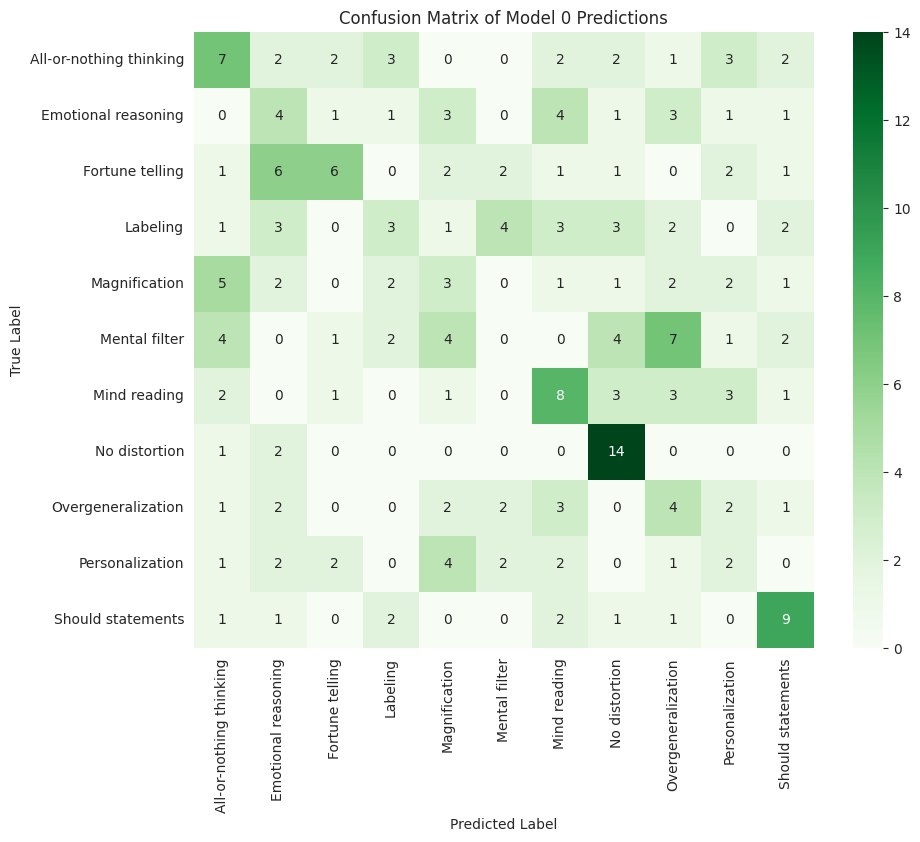

In [ ]:
from sklearn.metrics import confusion_matrix

categories = [code_to_category[i] for i in range(len(code_to_category))]

#pred_labels = np.argmax(model_0_pred_probs, axis=1)
pred_labels = model_0_pred_probs

conf_matrix = confusion_matrix(val_labels, pred_labels)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Greens", xticklabels=categories, yticklabels=categories)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of Model 0 Predictions');

### **Model 1: Feed-forward Neural Network (Simple Dense Model)**


In [ ]:
#Function to create TensorBoard callbacks

import datetime

def create_tensorboard_callback(dir_name, experiment_name):
  """
  Creates a TensorBoard callback instance to store log files.

  Stores log files with the filepath:
    "dir_name/experiment_name/current_datetime/"

  Args:
    dir_name: target directory to store TensorBoard log files
    experiment_name: name of experiment directory (e.g. efficientnet_model_1)
  """
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(
      log_dir=log_dir
  )
  print(f"Saving TensorBoard log files to: {log_dir}")
  return tensorboard_callback

In [ ]:
#Creating directory to save TensorBoard logs

SAVE_DIR = "model_logs"

In [ ]:
#Building model with the Functional API

from tensorflow.keras import layers

inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs) #turn the input text into numbers
x = embedding(x) #create an embedding of the numbers
x = layers.GlobalAveragePooling1D()(x) #lower the dimensionality of the embedding
outputs = layers.Dense(11, activation="softmax")(x) #create the output layer
model_1 = tf.keras.Model(inputs, outputs, name="model_1_dense") # construct the model

In [ ]:
#Compiling the model

model_1.compile(loss="sparse_categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
#Getting the model summary

model_1.summary()

Model: "model_1_dense"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 1)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ text_vectorization                   │ (None, 45)                  │               0 │
│ (TextVectorization)                  │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding_1 (Embedding)              │ (None, 45, 128)             │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d_1           │ (None, 128)                 │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 11)                  │           1,419 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,281,419 (4.89 MB)

 Trainable params: 1,281,419 (4.89 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Fitting the model

model_1_history = model_1.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR, experiment_name="simple_dense_model")])

Saving TensorBoard log files to: model_logs/simple_dense_model/20241001-101414
Epoch 1/5
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.0658 - loss: 2.4048 - val_accuracy: 0.1591 - val_loss: 2.3709
Epoch 2/5
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.2713 - loss: 2.3448 - val_accuracy: 0.1500 - val_loss: 2.3513
Epoch 3/5
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.2621 - loss: 2.3098 - val_accuracy: 0.1500 - val_loss: 2.3367
Epoch 4/5
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.2691 - loss: 2.2805 - val_accuracy: 0.1455 - val_loss: 2.3222
Epoch 5/5
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.2805 - loss: 2.2520 - val_accuracy: 0.1455 - val_loss: 2.3075


In [ ]:
#Evaluating the model on the validation data

model_1.evaluate(val_sentences, val_labels)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1513 - loss: 2.3053 


[2.3074727058410645, 0.145454540848732]

**Visualizing loss and accuracy values**

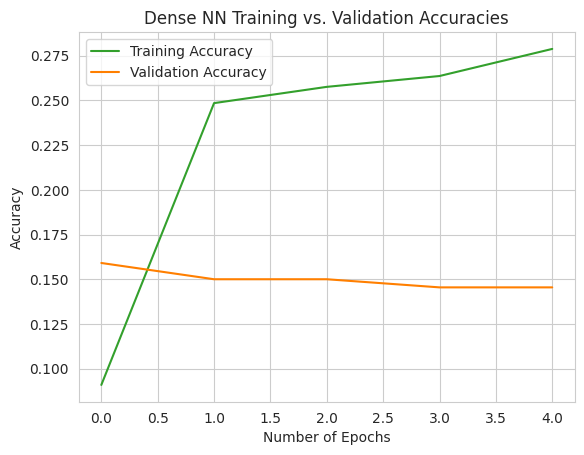

In [ ]:
plt.plot(model_1_history.history['accuracy'], label='Training Accuracy', color=palette[3])
plt.plot(model_1_history.history['val_accuracy'], label = 'Validation Accuracy', color=palette[7])
plt.title('Dense NN Training vs. Validation Accuracies')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.legend();

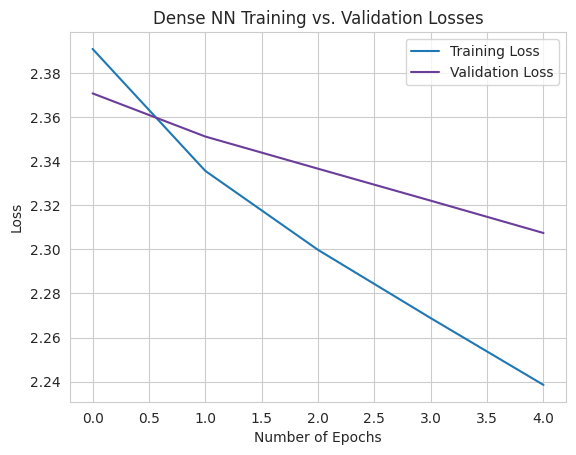

In [ ]:
plt.plot(model_1_history.history['loss'], label='Training Loss', color=palette[1])
plt.plot(model_1_history.history['val_loss'], label = 'Validation Loss', color=palette[9])
plt.title('Dense NN Training vs. Validation Losses')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.legend();

In [ ]:
#Making predictions

model_1_pred_probs = model_1.predict(val_sentences)
model_1_pred_probs[:10]

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


array([[0.07402858, 0.11188305, 0.10124524, 0.09395493, 0.0840836 ,
        0.07924872, 0.10105627, 0.02708257, 0.11147602, 0.09071378,
        0.12522723],
       [0.0997997 , 0.09111853, 0.08023486, 0.0814646 , 0.0996895 ,
        0.08606308, 0.08161647, 0.11669897, 0.08104152, 0.09447078,
        0.08780202],
       [0.09994432, 0.08766062, 0.07876094, 0.08400279, 0.09418932,
        0.08567446, 0.08688188, 0.12004361, 0.08150548, 0.09381001,
        0.08752665],
       [0.09569277, 0.08745229, 0.07626693, 0.08106824, 0.09291733,
        0.08489951, 0.08179702, 0.14364864, 0.08164854, 0.08989717,
        0.08471165],
       [0.1050477 , 0.09107143, 0.08244579, 0.07907212, 0.0982417 ,
        0.0855256 , 0.08188295, 0.11135478, 0.08278561, 0.09281162,
        0.08976077],
       [0.06165385, 0.11425152, 0.10860233, 0.10100204, 0.07531794,
        0.07726245, 0.11044174, 0.01968826, 0.12660907, 0.0849489 ,
        0.12022192],
       [0.03623012, 0.12599538, 0.11533955, 0.10809515, 0.

In [ ]:
#Turning prediction probabilities into 1D tensors

model_1_preds = tf.argmax(model_1_pred_probs, axis=1)
model_1_preds[:20]

<tf.Tensor: shape=(20,), dtype=int64, numpy=
array([10,  7,  7,  7,  7,  8,  8,  8,  8,  9,  7,  8,  7,  1, 10,  7,  8,
        8,  7,  8])>

**Confusion matrix of true labels and predictions**

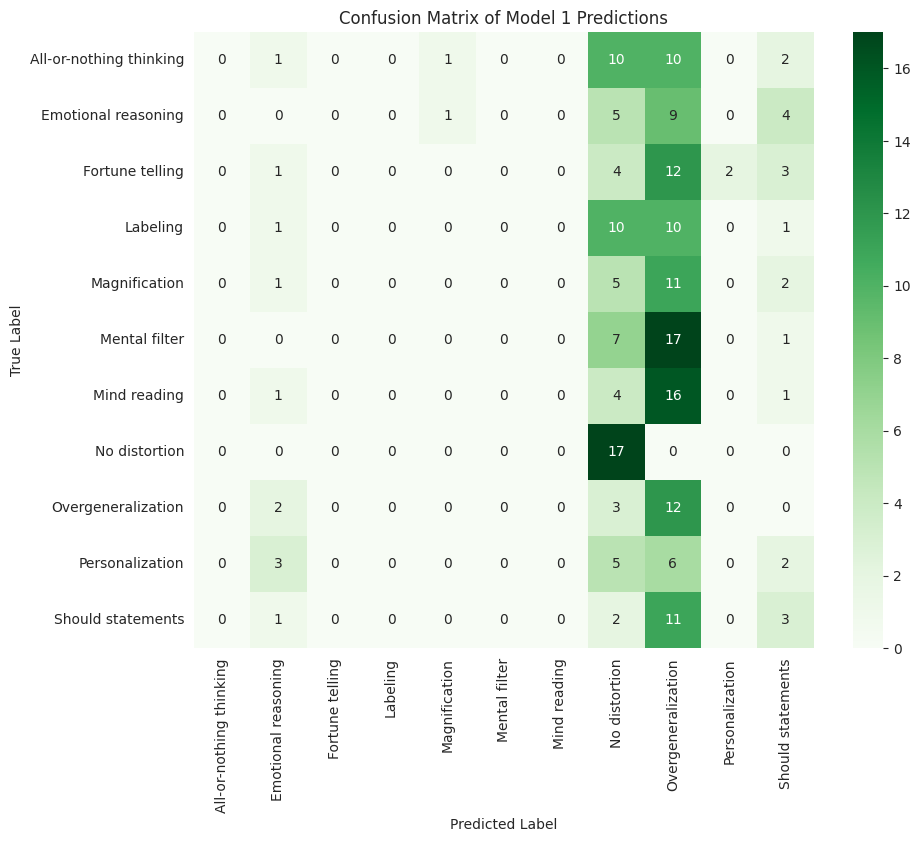

In [ ]:
from sklearn.metrics import confusion_matrix

categories = [code_to_category[i] for i in range(len(code_to_category))]

pred_labels = model_1_preds

conf_matrix = confusion_matrix(val_labels, pred_labels)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Greens", xticklabels=categories, yticklabels=categories)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of Model 1 Predictions');

In [ ]:
code_to_category

{0: 'All-or-nothing thinking',
 1: 'Emotional reasoning',
 2: 'Fortune telling',
 3: 'Labeling',
 4: 'Magnification',
 5: 'Mental filter',
 6: 'Mind reading',
 7: 'No distortion',
 8: 'Overgeneralization',
 9: 'Personalization',
 10: 'Should statements'}

In [ ]:
#Calculating model_1 metrics

model_1_results = calculate_results(y_true=val_labels, y_pred=model_1_preds)
model_1_results

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


{'accuracy': 14.545454545454545,
 'precision': 0.03857987772461457,
 'recall': 0.14545454545454545,
 'f1': 0.05655554169363243}

In [ ]:
#Creating function to compare our baseline results to new model results

def compare_baseline_to_new_results(baseline_results, new_model_results):
  for key, value in baseline_results.items():
    print(f"Baseline {key}: {value:.2f}, New {key}: {new_model_results[key]:.2f}, Difference: {new_model_results[key]-value:.2f}")

In [ ]:
compare_baseline_to_new_results(baseline_results=baseline_results, new_model_results=model_1_results)

Baseline accuracy: 27.27, New accuracy: 14.55, Difference: -12.73
Baseline precision: 0.25, New precision: 0.04, Difference: -0.21
Baseline recall: 0.27, New recall: 0.15, Difference: -0.13
Baseline f1: 0.25, New f1: 0.06, Difference: -0.20


**Visualizing learned embeddings using the Embedding Projector tool**

In [ ]:
#Getting the vocabulary from the text vectorization layer

words_in_vocab = text_vectorizer.get_vocabulary()
len(words_in_vocab), words_in_vocab[:10]

(3403, ['', '[UNK]', 'i', 'and', 'to', 'my', 'the', 'a', 'me', 'of'])

In [ ]:
model_1.summary()

Model: "model_1_dense"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 1)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ text_vectorization                   │ (None, 45)                  │               0 │
│ (TextVectorization)                  │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding_1 (Embedding)              │ (None, 45, 128)             │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d_1           │ (None, 128)                 │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 11)                  │           1,419 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,844,259 (14.66 MB)

 Trainable params: 1,281,419 (4.89 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,562,840 (9.78 MB)

In [ ]:
#Getting the weight matrix of the embedding layer (patterns the model has learned)

embed_weights = model_1.get_layer("embedding_1").get_weights()[0]
print(embed_weights.shape)

(10000, 128)


In [ ]:
#Code from: https://www.tensorflow.org/tutorials/text/word_embeddings#retrieve_the_trained_word_embeddings_and_save_them_to_disk

import io

#Creating output writers

out_v = io.open("embedding_vectors.tsv", "w", encoding="utf-8")
out_m = io.open("embedding_metadata.tsv", "w", encoding="utf-8")

#Writing embedding vectors and words to file

for num, word in enumerate(words_in_vocab):
  if num == 0:
     continue # skip padding token
  vec = embed_weights[num]
  out_m.write(word + "\n") # write words to file
  out_v.write("\t".join([str(x) for x in vec]) + "\n") # write corresponding word vector to file
out_v.close()
out_m.close()

#Downloading files locally to upload to Embedding Projector

try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download("embedding_vectors.tsv")
  files.download("embedding_metadata.tsv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

*Steps:*
1. Go to http://projector.tensorflow.org/
2. Click on "Load data"
3. Upload the two files downloaded (embedding_vectors.tsv and embedding_metadata.tsv)
4. Explore

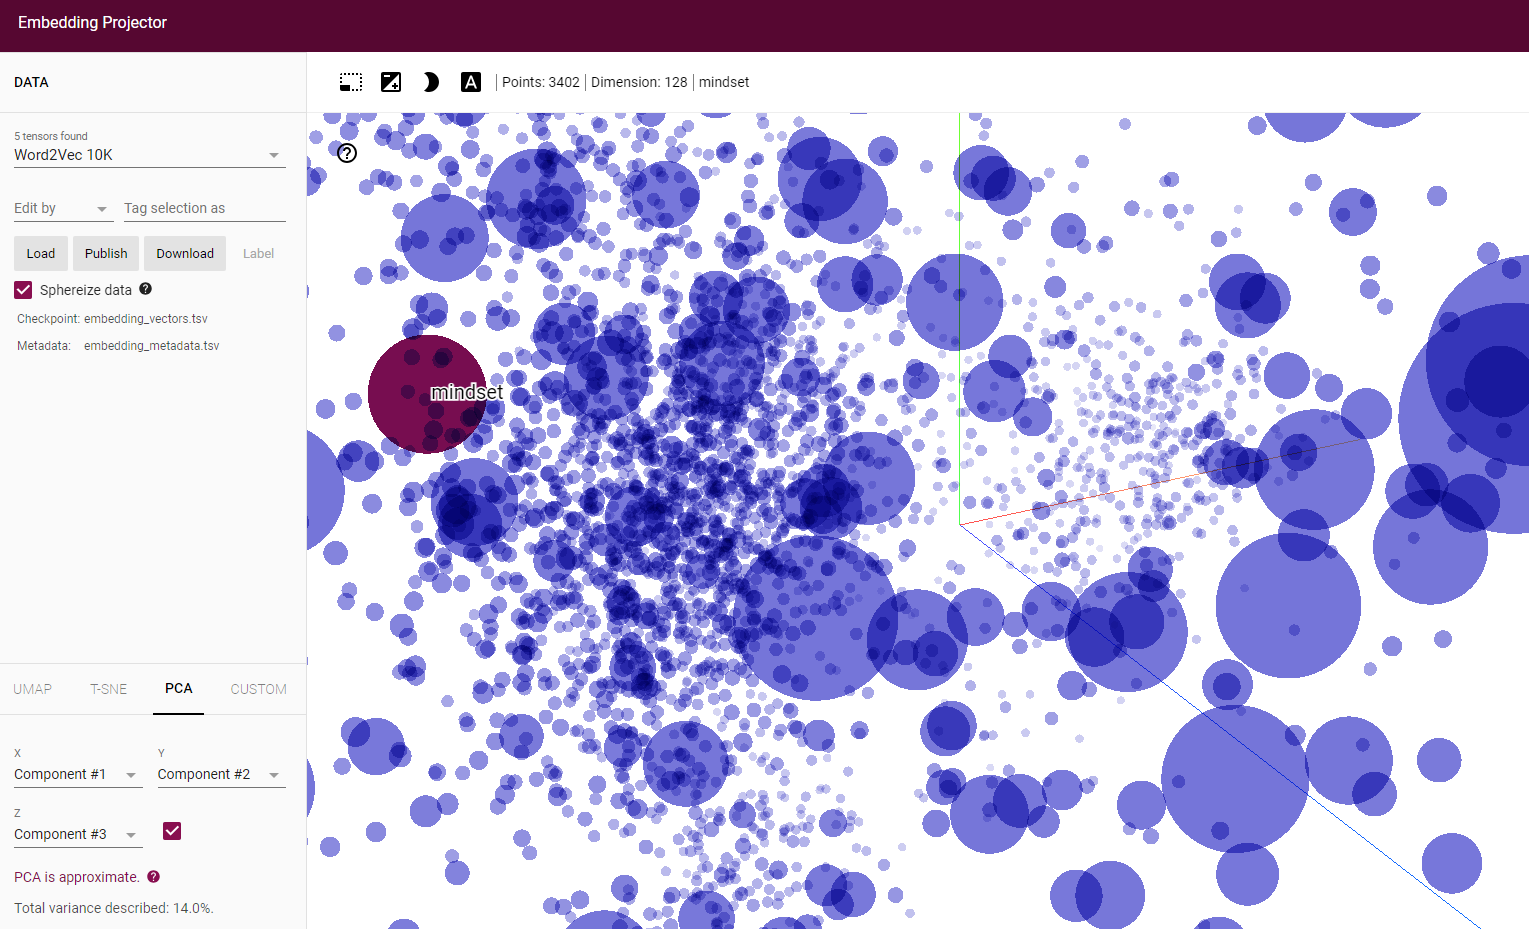

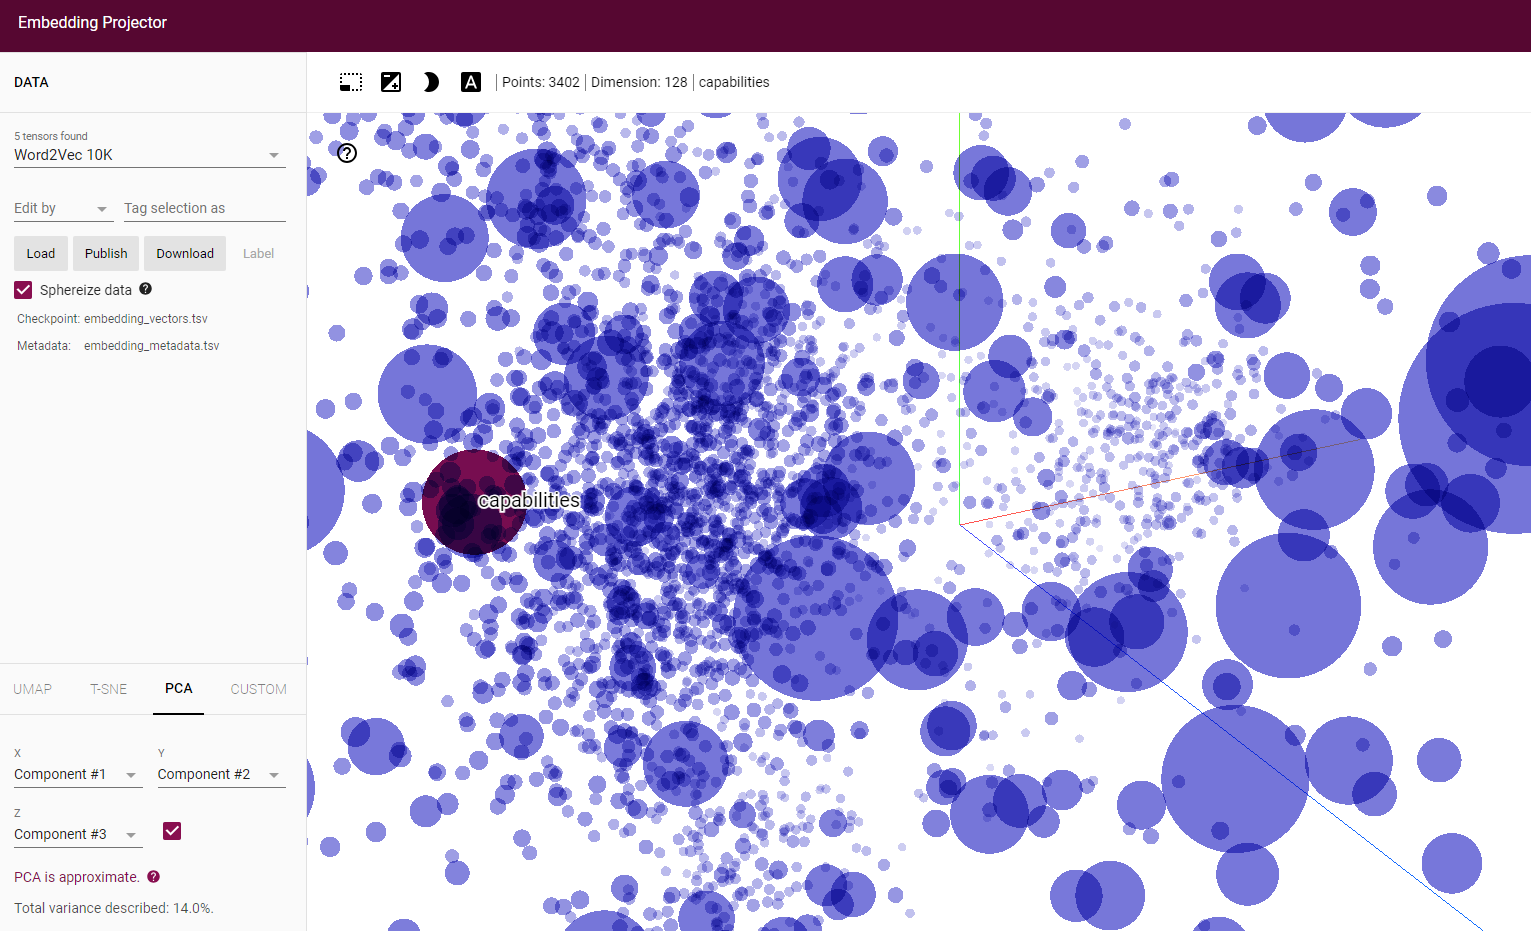

Based on this approach, the words *'mindset'* and *'capabilities'* are closely linked.

###**Model 2: LSTM Model (RNN)**

In [ ]:
tf.random.set_seed(42)

from tensorflow.keras import layers

model_2_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=max_length,
                                     name="embedding_2")

#Creating an LSTM model

inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = model_2_embedding(x)
print(x.shape)
# x = layers.LSTM(64, return_sequences=True)(x) #return vector for each word in the Tweet (you can stack RNN cells as long as return_sequences=True)
x = layers.LSTM(64)(x) #return vector for whole sequence
print(x.shape)
# x = layers.Dense(64, activation="relu")(x) #optional dense layer on top of output of LSTM cell
outputs = layers.Dense(11, activation="softmax")(x)
model_2 = tf.keras.Model(inputs, outputs, name="model_2_LSTM")

(None, 45, 128)
(None, 64)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
#Compiling model

model_2.compile(loss="sparse_categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
model_2.summary()

Model: "model_2_LSTM"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 1)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ text_vectorization                   │ (None, 45)                  │               0 │
│ (TextVectorization)                  │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding_2 (Embedding)              │ (None, 45, 128)             │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 11)                  │             715 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,330,123 (5.07 MB)

 Trainable params: 1,330,123 (5.07 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Fitting model

model_2_history = model_2.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, "LSTM")])

Saving TensorBoard log files to: model_logs/LSTM/20241001-101450
Epoch 1/5
21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - accuracy: 0.0801 - loss: 2.3924 - val_accuracy: 0.1318 - val_loss: 2.3639
Epoch 2/5
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.1712 - loss: 2.3373 - val_accuracy: 0.1500 - val_loss: 2.3210
Epoch 3/5
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.1440 - loss: 2.2720 - val_accuracy: 0.1545 - val_loss: 2.2684
Epoch 4/5
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.2259 - loss: 2.1540 - val_accuracy: 0.1500 - val_loss: 2.2492
Epoch 5/5
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - accuracy: 0.2954 - loss: 2.0816 - val_accuracy: 0.1773 - val_loss: 2.2494


In [ ]:
#Evaluating the model on the validation data

model_2.evaluate(val_sentences, val_labels)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.1836 - loss: 2.2491


[2.2494068145751953, 0.1772727221250534]

**Visualizing loss and accuracy values**

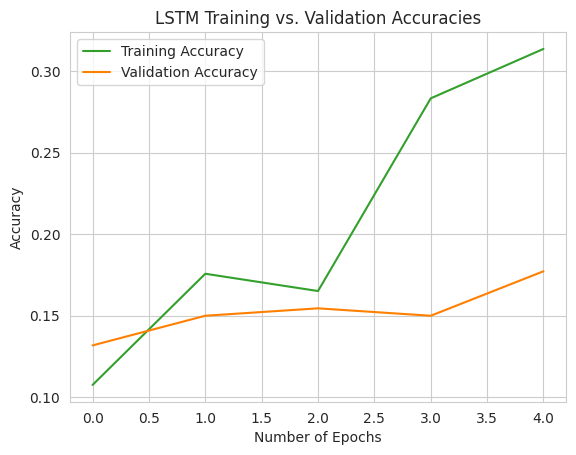

In [ ]:
plt.plot(model_2_history.history['accuracy'], label='Training Accuracy', color=palette[3])
plt.plot(model_2_history.history['val_accuracy'], label = 'Validation Accuracy', color=palette[7])
plt.title('LSTM Training vs. Validation Accuracies')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.legend();

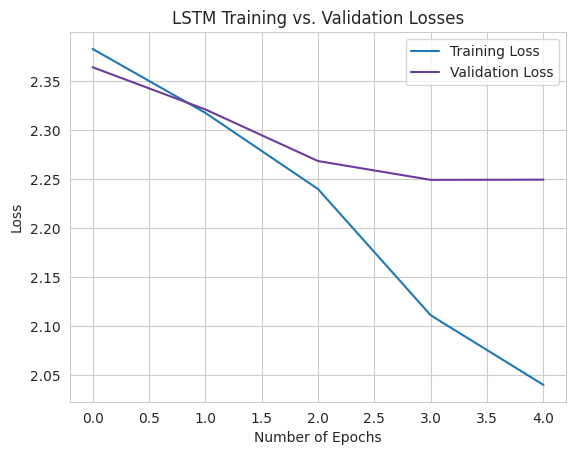

In [ ]:
plt.plot(model_2_history.history['loss'], label='Training Loss', color=palette[1])
plt.plot(model_2_history.history['val_loss'], label = 'Validation Loss', color=palette[9])
plt.title('LSTM Training vs. Validation Losses')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.legend();

In [ ]:
#Making predictions on the validation dataset

model_2_pred_probs = model_2.predict(val_sentences)
model_2_pred_probs.shape, model_2_pred_probs[:10]

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step


((220, 11),
 array([[0.05201724, 0.12628256, 0.10188334, 0.09043721, 0.06656045,
         0.08343951, 0.11957394, 0.0032932 , 0.1320539 , 0.08928762,
         0.13517104],
        [0.08829816, 0.09687694, 0.09307509, 0.08958624, 0.08810558,
         0.09256476, 0.09593388, 0.07061569, 0.09382946, 0.09166813,
         0.09944596],
        [0.06909043, 0.0996076 , 0.09605413, 0.10056222, 0.07936661,
         0.09812641, 0.09692029, 0.07586273, 0.10635339, 0.09281275,
         0.08524334],
        [0.14382657, 0.05841445, 0.0528248 , 0.0712981 , 0.1434177 ,
         0.05361715, 0.05528858, 0.21897201, 0.06168758, 0.08587322,
         0.05477968],
        [0.08276819, 0.10537887, 0.09655967, 0.09071803, 0.08810345,
         0.08981849, 0.10216297, 0.03088447, 0.10337129, 0.09991652,
         0.11031807],
        [0.05081544, 0.1264551 , 0.10222558, 0.09195403, 0.06576287,
         0.08354313, 0.12005032, 0.00323226, 0.13327186, 0.08822878,
         0.13446051],
        [0.04897201, 0.12651

In [ ]:
#Turning prediction probabilities into 1D tensors

model_2_preds = tf.argmax(model_2_pred_probs, axis=1)
model_2_preds[:20]

<tf.Tensor: shape=(20,), dtype=int64, numpy=
array([10, 10,  8,  7, 10, 10,  8, 10, 10, 10,  1, 10, 10, 10, 10,  8, 10,
       10,  7, 10])>

**Confusion matrix of true labels and predictions**

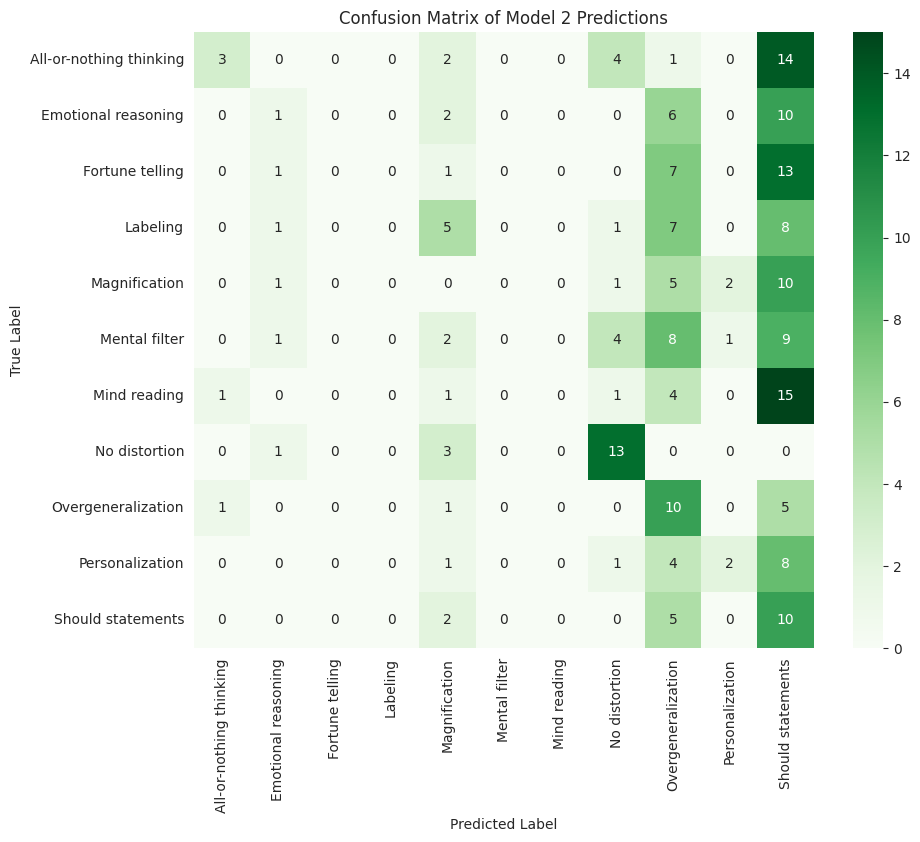

In [ ]:
from sklearn.metrics import confusion_matrix

categories = [code_to_category[i] for i in range(len(code_to_category))]

pred_labels = model_2_preds

conf_matrix = confusion_matrix(val_labels, pred_labels)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Greens", xticklabels=categories, yticklabels=categories)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of Model 2 Predictions');

In [ ]:
code_to_category

{0: 'All-or-nothing thinking',
 1: 'Emotional reasoning',
 2: 'Fortune telling',
 3: 'Labeling',
 4: 'Magnification',
 5: 'Mental filter',
 6: 'Mind reading',
 7: 'No distortion',
 8: 'Overgeneralization',
 9: 'Personalization',
 10: 'Should statements'}

In [ ]:
#Calculating LSTM model results

model_2_results = calculate_results(y_true=val_labels, y_pred=model_2_preds)
model_2_results

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


{'accuracy': 17.727272727272727,
 'precision': 0.17025358851674638,
 'recall': 0.17727272727272728,
 'f1': 0.12503946938429697}

In [ ]:
compare_baseline_to_new_results(baseline_results, model_2_results)

Baseline accuracy: 27.27, New accuracy: 17.73, Difference: -9.55
Baseline precision: 0.25, New precision: 0.17, Difference: -0.08
Baseline recall: 0.27, New recall: 0.18, Difference: -0.10
Baseline f1: 0.25, New f1: 0.13, Difference: -0.13


###**Model 3: GRU Model (RNN)**

In [ ]:
tf.random.set_seed(42)

from tensorflow.keras import layers

model_3_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=max_length,
                                     name="embedding_3")

#Building a GRU model

inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = model_3_embedding(x)
# x = layers.GRU(64, return_sequences=True) # stacking recurrent cells requires return_sequences=True
x = layers.GRU(64)(x)
# x = layers.Dense(64, activation="relu")(x) # optional dense layer after GRU cell
outputs = layers.Dense(11, activation="softmax")(x)
model_3 = tf.keras.Model(inputs, outputs, name="model_3_GRU")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
#Compiling the GRU model

model_3.compile(loss="sparse_categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
model_3.summary()

Model: "model_3_GRU"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 1)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ text_vectorization                   │ (None, 45)                  │               0 │
│ (TextVectorization)                  │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding_3 (Embedding)              │ (None, 45, 128)             │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru (GRU)                            │ (None, 64)                  │          37,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 11)                  │             715 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,317,963 (5.03 MB)

 Trainable params: 1,317,963 (5.03 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Fitting the model

model_3_history = model_3.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, "GRU")])

Saving TensorBoard log files to: model_logs/GRU/20241001-101639
Epoch 1/5
21/21 ━━━━━━━━━━━━━━━━━━━━ 6s 123ms/step - accuracy: 0.0739 - loss: 2.3987 - val_accuracy: 0.0909 - val_loss: 2.3805
Epoch 2/5
21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - accuracy: 0.2549 - loss: 2.3539 - val_accuracy: 0.1409 - val_loss: 2.3574
Epoch 3/5
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - accuracy: 0.1684 - loss: 2.3051 - val_accuracy: 0.1500 - val_loss: 2.3172
Epoch 4/5
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - accuracy: 0.1362 - loss: 2.2353 - val_accuracy: 0.1500 - val_loss: 2.2965
Epoch 5/5
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 0.1911 - loss: 2.1545 - val_accuracy: 0.1500 - val_loss: 2.2720


In [ ]:
#Evaluating the model on the validation data

model_3.evaluate(val_sentences, val_labels)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.1635 - loss: 2.2633


[2.2719643115997314, 0.15000000596046448]

**Visualizing loss and accuracy values**

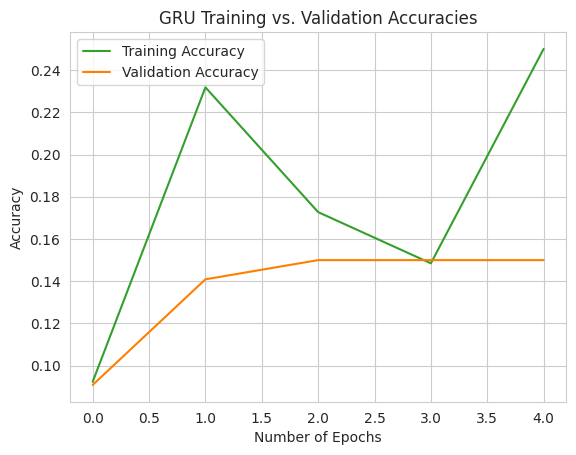

In [ ]:
plt.plot(model_3_history.history['accuracy'], label='Training Accuracy', color=palette[3])
plt.plot(model_3_history.history['val_accuracy'], label = 'Validation Accuracy', color=palette[7])
plt.title('GRU Training vs. Validation Accuracies')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.legend();

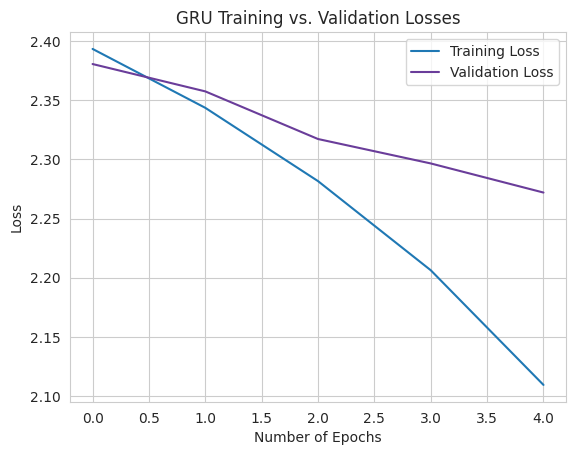

In [ ]:
plt.plot(model_3_history.history['loss'], label='Training Loss', color=palette[1])
plt.plot(model_3_history.history['val_loss'], label = 'Validation Loss', color=palette[9])
plt.title('GRU Training vs. Validation Losses')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.legend();

In [ ]:
#Making predictions on the validation data

model_3_pred_probs = model_3.predict(val_sentences)
model_3_pred_probs.shape, model_3_pred_probs[:10]

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step


((220, 11),
 array([[0.06720605, 0.12322254, 0.1024567 , 0.09591472, 0.0726747 ,
         0.08009964, 0.11119966, 0.00092067, 0.12618832, 0.08365325,
         0.1364638 ],
        [0.09485313, 0.10378032, 0.09057708, 0.08824591, 0.09545106,
         0.10040502, 0.09114023, 0.05189343, 0.0948377 , 0.08289305,
         0.10592303],
        [0.09708229, 0.09387748, 0.09029593, 0.0787534 , 0.08289447,
         0.09931345, 0.08344691, 0.10641314, 0.08642515, 0.0954936 ,
         0.08600417],
        [0.07635013, 0.05871299, 0.06425256, 0.06409415, 0.08939538,
         0.05602794, 0.07239826, 0.30499494, 0.05572684, 0.11430574,
         0.04374107],
        [0.10208286, 0.09449086, 0.0925068 , 0.0904121 , 0.1048851 ,
         0.09025387, 0.09988799, 0.01807548, 0.10086329, 0.10376061,
         0.10278095],
        [0.0661745 , 0.12448972, 0.10279378, 0.09631564, 0.07191829,
         0.07980759, 0.11168451, 0.00088382, 0.12645257, 0.08282282,
         0.13665682],
        [0.06468078, 0.12660

In [ ]:
#Turning prediction probabilities into 1D tensors

model_3_preds = tf.argmax(model_3_pred_probs, axis=1)
model_3_preds[:20]

<tf.Tensor: shape=(20,), dtype=int64, numpy=
array([10, 10,  7,  7,  4, 10, 10, 10, 10,  4,  1, 10,  1, 10, 10,  6, 10,
       10,  7, 10])>

**Confusion matrix of true labels and predictions**

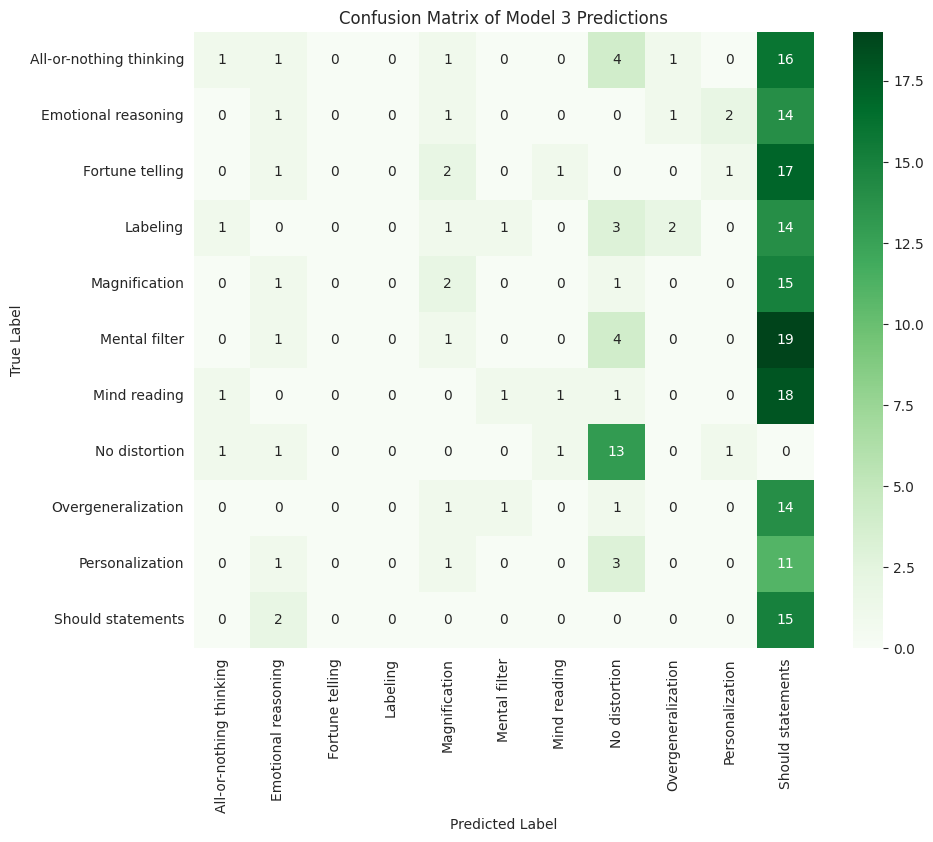

In [ ]:
from sklearn.metrics import confusion_matrix

categories = [code_to_category[i] for i in range(len(code_to_category))]

pred_labels = model_3_preds

conf_matrix = confusion_matrix(val_labels, pred_labels)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Greens", xticklabels=categories, yticklabels=categories)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of Model 3 Predictions');

In [ ]:
code_to_category

{0: 'All-or-nothing thinking',
 1: 'Emotional reasoning',
 2: 'Fortune telling',
 3: 'Labeling',
 4: 'Magnification',
 5: 'Mental filter',
 6: 'Mind reading',
 7: 'No distortion',
 8: 'Overgeneralization',
 9: 'Personalization',
 10: 'Should statements'}

In [ ]:
#Calcuating model_3 results

model_3_results = calculate_results(y_true=val_labels, y_pred=model_3_preds)
model_3_results

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


{'accuracy': 15.0,
 'precision': 0.12853535353535353,
 'recall': 0.15,
 'f1': 0.09025624338977235}

In [ ]:
compare_baseline_to_new_results(baseline_results, model_3_results)

Baseline accuracy: 27.27, New accuracy: 15.00, Difference: -12.27
Baseline precision: 0.25, New precision: 0.13, Difference: -0.12
Baseline recall: 0.27, New recall: 0.15, Difference: -0.12
Baseline f1: 0.25, New f1: 0.09, Difference: -0.16


###**Model 4: Bidirectional - LSTM model (RNN)**

In [ ]:
tf.random.set_seed(42)

from tensorflow.keras import layers

model_4_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=max_length,
                                     name="embedding_4")

#Building a Bidirectional model

inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = model_4_embedding(x)
# x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(x) # stacking RNN layers requires return_sequences=True
x = layers.Bidirectional(layers.LSTM(64))(x) # bidirectional goes both ways so has double the parameters of a regular LSTM layer
outputs = layers.Dense(11, activation="softmax")(x)
model_4 = tf.keras.Model(inputs, outputs, name="model_4_Bidirectional")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
#Compiling the model

model_4.compile(loss="sparse_categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
model_4.summary()

Model: "model_4_Bidirectional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)           │ (None, 1)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ text_vectorization                   │ (None, 45)                  │               0 │
│ (TextVectorization)                  │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding_4 (Embedding)              │ (None, 45, 128)             │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 128)                 │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 11)                  │           1,419 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,380,235 (5.27 MB)

 Trainable params: 1,380,235 (5.27 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Fitting the model

model_4_history = model_4.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, "bidirectional_RNN")])

Saving TensorBoard log files to: model_logs/bidirectional_RNN/20241001-101755
Epoch 1/5
21/21 ━━━━━━━━━━━━━━━━━━━━ 8s 162ms/step - accuracy: 0.0675 - loss: 2.3907 - val_accuracy: 0.2000 - val_loss: 2.3465
Epoch 2/5
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 145ms/step - accuracy: 0.2217 - loss: 2.3020 - val_accuracy: 0.1591 - val_loss: 2.2719
Epoch 3/5
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step - accuracy: 0.2059 - loss: 2.1916 - val_accuracy: 0.1773 - val_loss: 2.2049
Epoch 4/5
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 90ms/step - accuracy: 0.3023 - loss: 2.0219 - val_accuracy: 0.2136 - val_loss: 2.1713
Epoch 5/5
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - accuracy: 0.4223 - loss: 1.8239 - val_accuracy: 0.2182 - val_loss: 2.1628


In [ ]:
#Evaluating the model on the validation data

model_4.evaluate(val_sentences, val_labels)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.2067 - loss: 2.2461


[2.27237606048584, 0.19545455276966095]

**Visualizing loss and accuracy values**

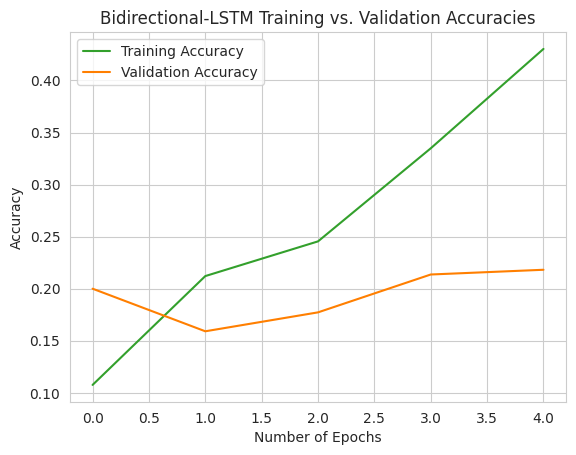

In [ ]:
plt.plot(model_4_history.history['accuracy'], label='Training Accuracy', color=palette[3])
plt.plot(model_4_history.history['val_accuracy'], label = 'Validation Accuracy', color=palette[7])
plt.title('Bidirectional-LSTM Training vs. Validation Accuracies')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.legend();

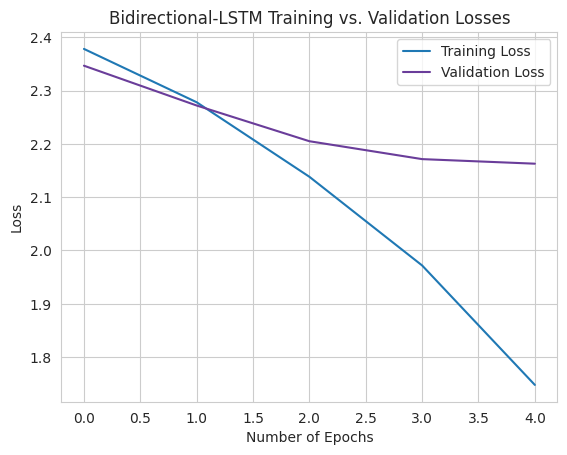

In [ ]:
plt.plot(model_4_history.history['loss'], label='Training Loss', color=palette[1])
plt.plot(model_4_history.history['val_loss'], label = 'Validation Loss', color=palette[9])
plt.title('Bidirectional-LSTM Training vs. Validation Losses')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.legend();

In [ ]:
#Making predictions on the validation data

model_4_pred_probs = model_4.predict(val_sentences)
model_4_pred_probs[:10]

7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 146ms/step


array([[0.03054496, 0.13769093, 0.12616305, 0.01892758, 0.06108205,
        0.0331403 , 0.0814138 , 0.00045929, 0.01950115, 0.07163201,
        0.4194448 ],
       [0.04107652, 0.07466472, 0.05538538, 0.19669706, 0.05670635,
        0.09274134, 0.09553453, 0.01066836, 0.23816696, 0.1090306 ,
        0.02932817],
       [0.13546528, 0.10837003, 0.08735175, 0.07214105, 0.08824555,
        0.09697536, 0.09213027, 0.02302394, 0.05944678, 0.08162951,
        0.15522054],
       [0.13294765, 0.04137067, 0.03379335, 0.13477063, 0.07426326,
        0.11210235, 0.04862299, 0.2072276 , 0.11391287, 0.068813  ,
        0.03217562],
       [0.16232331, 0.09631298, 0.08862125, 0.07026011, 0.11464157,
        0.11346103, 0.07024442, 0.01040522, 0.06099893, 0.07532734,
        0.13740379],
       [0.02129154, 0.16687581, 0.12151006, 0.05860484, 0.05466691,
        0.0423582 , 0.1673907 , 0.00067099, 0.08441754, 0.10843927,
        0.17377415],
       [0.03279405, 0.1511862 , 0.1347708 , 0.04665199, 0.

In [ ]:
#Turning prediction probabilities into 1D tensors

model_4_preds = tf.argmax(model_4_pred_probs, axis=1)
model_4_preds[:20]

<tf.Tensor: shape=(20,), dtype=int64, numpy=
array([10,  8, 10,  7,  0, 10, 10,  8,  8, 10, 10,  3,  1,  0,  0, 10,  8,
        8,  7,  8])>

**Confusion matrix of true labels and predictions**

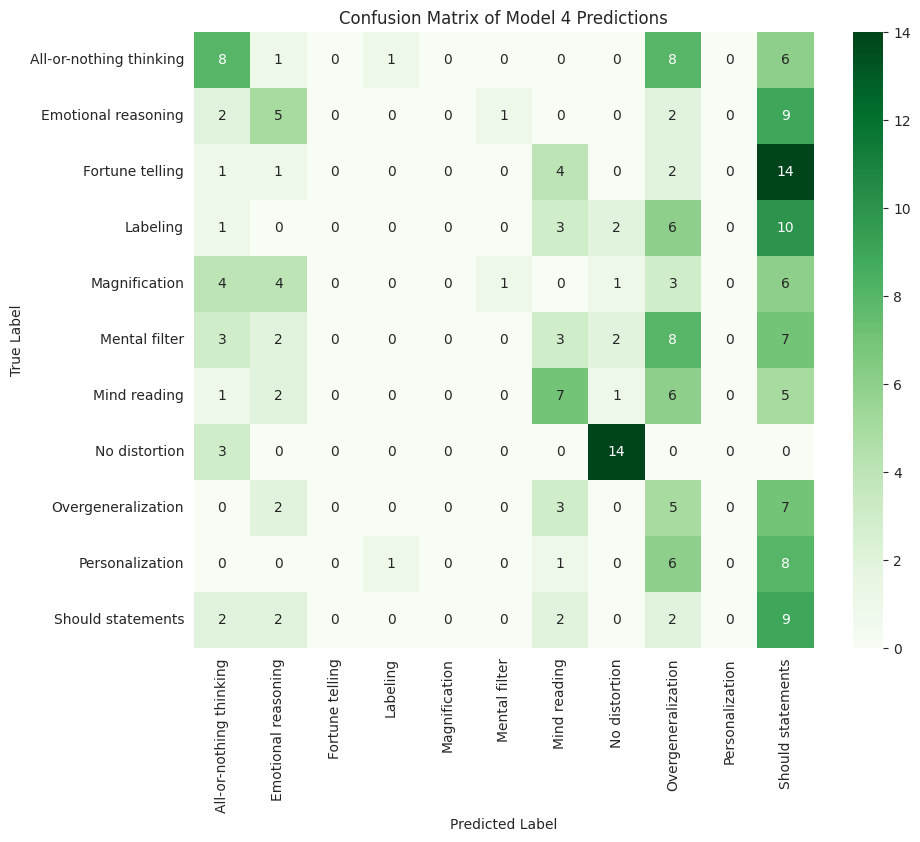

In [ ]:
from sklearn.metrics import confusion_matrix

categories = [code_to_category[i] for i in range(len(code_to_category))]

pred_labels = model_4_preds

conf_matrix = confusion_matrix(val_labels, pred_labels)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Greens", xticklabels=categories, yticklabels=categories)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of Model 4 Predictions');

In [ ]:
code_to_category

{0: 'All-or-nothing thinking',
 1: 'Emotional reasoning',
 2: 'Fortune telling',
 3: 'Labeling',
 4: 'Magnification',
 5: 'Mental filter',
 6: 'Mind reading',
 7: 'No distortion',
 8: 'Overgeneralization',
 9: 'Personalization',
 10: 'Should statements'}

In [ ]:
#Calculating model results

model_4_results = calculate_results(val_labels, model_4_preds)
model_4_results

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


{'accuracy': 21.818181818181817,
 'precision': 0.15879715634606936,
 'recall': 0.21818181818181817,
 'f1': 0.1740176254461969}

In [ ]:
compare_baseline_to_new_results(baseline_results, model_4_results)

Baseline accuracy: 27.27, New accuracy: 21.82, Difference: -5.45
Baseline precision: 0.25, New precision: 0.16, Difference: -0.09
Baseline recall: 0.27, New recall: 0.22, Difference: -0.05
Baseline f1: 0.25, New f1: 0.17, Difference: -0.08


###**Model 5: Conv1D (1D CNN)**

In [ ]:
tf.random.set_seed(42)

from tensorflow.keras import layers

model_5_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=max_length,
                                     name="embedding_5")

#Creating a 1D convolutional layer to model sequences

from tensorflow.keras import layers

inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = model_5_embedding(x)
x = layers.Conv1D(filters=32, kernel_size=5, activation="relu")(x)
x = layers.GlobalMaxPool1D()(x)
# x = layers.Dense(64, activation="relu")(x) # optional dense layer
outputs = layers.Dense(11, activation="softmax")(x)
model_5 = tf.keras.Model(inputs, outputs, name="model_5_Conv1D")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
model_5.compile(loss="sparse_categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
model_5.summary()

Model: "model_5_Conv1D"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)           │ (None, 1)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ text_vectorization                   │ (None, 45)                  │               0 │
│ (TextVectorization)                  │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding_5 (Embedding)              │ (None, 45, 128)             │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ (None, 41, 32)              │          20,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d                 │ (None, 32)                  │               0 │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 11)                  │             363 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,300,875 (4.96 MB)

 Trainable params: 1,300,875 (4.96 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model_5_history = model_5.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, "Conv1D")])

Saving TensorBoard log files to: model_logs/Conv1D/20241001-101933
Epoch 1/5
21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - accuracy: 0.0954 - loss: 2.4011 - val_accuracy: 0.1364 - val_loss: 2.3964
Epoch 2/5
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.2874 - loss: 2.3003 - val_accuracy: 0.1455 - val_loss: 2.3777
Epoch 3/5
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.3037 - loss: 2.2182 - val_accuracy: 0.1455 - val_loss: 2.3552
Epoch 4/5
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.3173 - loss: 2.1250 - val_accuracy: 0.1500 - val_loss: 2.3332
Epoch 5/5
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.4156 - loss: 2.0134 - val_accuracy: 0.1682 - val_loss: 2.3128


In [ ]:
#Evaluating the model on the validation data

model_5.evaluate(val_sentences, val_labels)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1880 - loss: 2.3097 


[2.312758207321167, 0.16818182170391083]

**Visualizing loss and accuracy values**

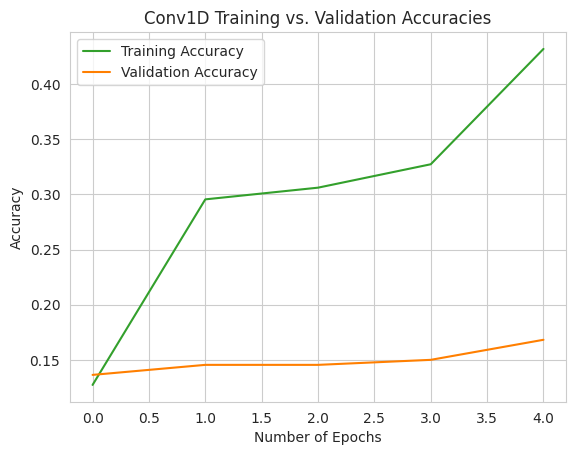

In [ ]:
plt.plot(model_5_history.history['accuracy'], label='Training Accuracy', color=palette[3])
plt.plot(model_5_history.history['val_accuracy'], label = 'Validation Accuracy', color=palette[7])
plt.title('Conv1D Training vs. Validation Accuracies')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.legend();

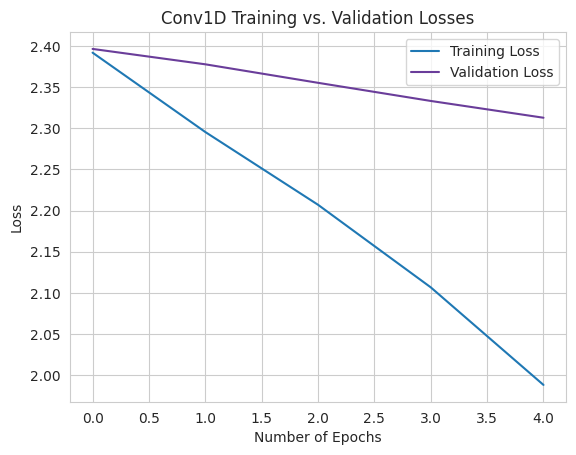

In [ ]:
plt.plot(model_5_history.history['loss'], label='Training Loss', color=palette[1])
plt.plot(model_5_history.history['val_loss'], label = 'Validation Loss', color=palette[9])
plt.title('Conv1D Training vs. Validation Losses')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.legend();

In [ ]:
#Making predictions

model_5_pred_probs = model_5.predict(val_sentences)
model_5_pred_probs[:10]

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


array([[0.0640962 , 0.09274265, 0.1131648 , 0.09157643, 0.07998678,
        0.06998315, 0.10178267, 0.02163701, 0.12641394, 0.07970351,
        0.15891278],
       [0.08021171, 0.09889314, 0.07110025, 0.07418255, 0.09142131,
        0.07667727, 0.08378915, 0.1561421 , 0.07848809, 0.09354788,
        0.09554661],
       [0.08326061, 0.10464193, 0.06782919, 0.07890788, 0.08421022,
        0.07177157, 0.09832046, 0.14306642, 0.07687153, 0.09407536,
        0.09704481],
       [0.08269025, 0.10533121, 0.06838194, 0.06845986, 0.07994077,
        0.07028162, 0.08741588, 0.17137113, 0.07387953, 0.09801342,
        0.09423436],
       [0.08122218, 0.1062996 , 0.07823865, 0.07269438, 0.09426229,
        0.0759018 , 0.09140663, 0.12787454, 0.07824379, 0.09132382,
        0.10253236],
       [0.06451762, 0.1028538 , 0.10726426, 0.08948685, 0.08402089,
        0.08147406, 0.10012953, 0.02321769, 0.13879111, 0.0739122 ,
        0.1343319 ],
       [0.06448832, 0.07580523, 0.12133172, 0.0971298 , 0.

In [ ]:
#Turning prediction probabilities into 1D tensors

model_5_preds = tf.argmax(model_5_pred_probs, axis=1)
model_5_preds[:20]

<tf.Tensor: shape=(20,), dtype=int64, numpy=
array([10,  7,  7,  7,  7,  8, 10,  8,  8, 10,  7,  8,  7,  8,  8,  7,  3,
        8,  7,  8])>

**Confusion matrix of true labels and predictions**

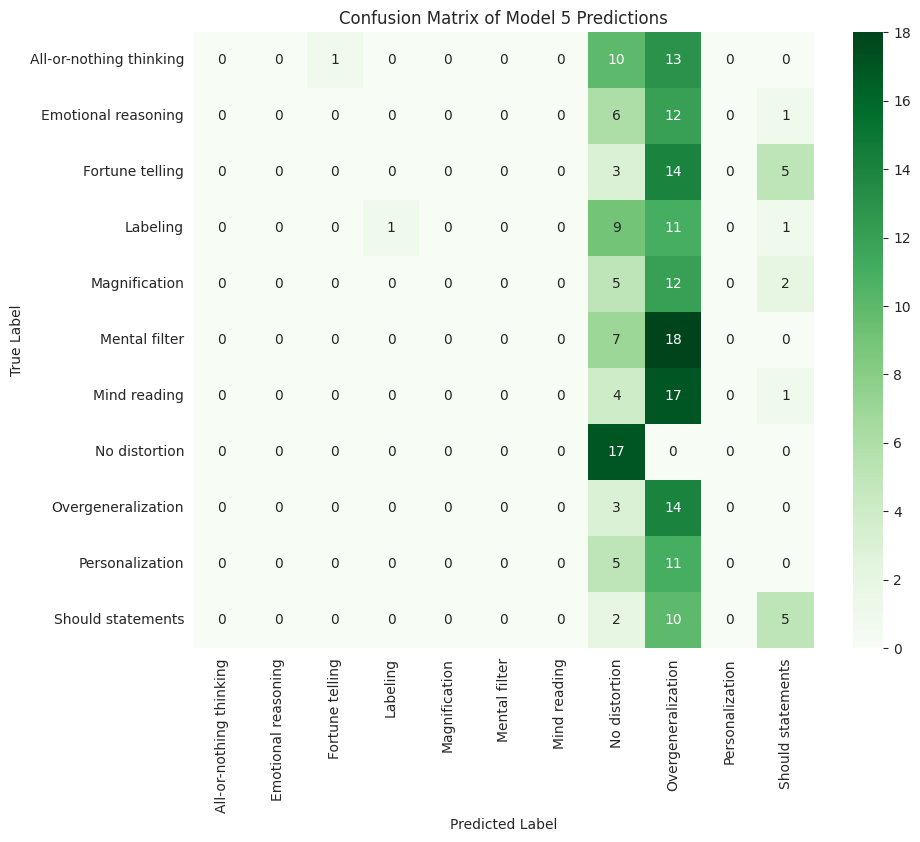

In [ ]:
from sklearn.metrics import confusion_matrix

categories = [code_to_category[i] for i in range(len(code_to_category))]

pred_labels = model_5_preds

conf_matrix = confusion_matrix(val_labels, pred_labels)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Greens", xticklabels=categories, yticklabels=categories)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of Model 5 Predictions');

In [ ]:
code_to_category

{0: 'All-or-nothing thinking',
 1: 'Emotional reasoning',
 2: 'Fortune telling',
 3: 'Labeling',
 4: 'Magnification',
 5: 'Mental filter',
 6: 'Mind reading',
 7: 'No distortion',
 8: 'Overgeneralization',
 9: 'Personalization',
 10: 'Should statements'}

In [ ]:
#Calculating evaluation metrics

model_5_results = calculate_results(y_true=val_labels, y_pred=model_5_preds)
model_5_results

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


{'accuracy': 16.818181818181817,
 'precision': 0.15245508865867383,
 'recall': 0.16818181818181818,
 'f1': 0.07721980076784506}

In [ ]:
compare_baseline_to_new_results(baseline_results, model_5_results)

Baseline accuracy: 27.27, New accuracy: 16.82, Difference: -10.45
Baseline precision: 0.25, New precision: 0.15, Difference: -0.10
Baseline recall: 0.27, New recall: 0.17, Difference: -0.10
Baseline f1: 0.25, New f1: 0.08, Difference: -0.18


###**Model 6: Transfer Learning - USE (Pretrained Encoder)**

For this model I will be using a TensorFlow version of 2.15.x.

In [ ]:
# !pip install tensorflow==2.15.0 keras==2.15.0

In [ ]:
#Creating a sentence encoder layer in place of the usual vectorizer and embedding layers

use_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        input_shape=[],
                                        dtype=tf.string,
                                        trainable=False,
                                        name="USE")

In [ ]:
#Building the model

model_6 = tf.keras.Sequential(name="model_6_USE")
model_6.add(use_encoder_layer) #Adding the sentence encoder layer
model_6.add(tf.keras.layers.Dense(64, activation='relu')) #Hidden dense layer 1
model_6.add(tf.keras.layers.Dense(11, activation='softmax')) #Output layer for the 11 classes

In [ ]:
model_6.compile(loss="sparse_categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
model_6.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_4 (Dense)             (None, 64)                32832     
                                                                 
 dense_5 (Dense)             (None, 11)                715       
                                                                 
Total params: 256831371 (979.73 MB)
Trainable params: 33547 (131.04 KB)
Non-trainable params: 256797824 (979.61 MB)
_________________________________________________________________


In [ ]:
model_6_history = model_6.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, "tf_hub_sentence_encoder_use")])

Saving TensorBoard log files to: model_logs/tf_hub_sentence_encoder_use/20241001-103221
Epoch 1/5
21/21 [==============================] - 6s 61ms/step - loss: 2.3930 - accuracy: 0.1076 - val_loss: 2.3772 - val_accuracy: 0.1864
Epoch 2/5
21/21 [==============================] - 1s 29ms/step - loss: 2.3467 - accuracy: 0.3000 - val_loss: 2.3520 - val_accuracy: 0.2409
Epoch 3/5
21/21 [==============================] - 1s 40ms/step - loss: 2.2916 - accuracy: 0.3652 - val_loss: 2.3145 - val_accuracy: 0.2773
Epoch 4/5
21/21 [==============================] - 1s 40ms/step - loss: 2.2238 - accuracy: 0.4242 - val_loss: 2.2721 - val_accuracy: 0.3000
Epoch 5/5
21/21 [==============================] - 1s 29ms/step - loss: 2.1436 - accuracy: 0.4318 - val_loss: 2.2302 - val_accuracy: 0.2909


In [ ]:
#Evaluating the model on the validation data

model_6.evaluate(val_sentences, val_labels)

7/7 [==============================] - 0s 21ms/step - loss: 2.2302 - accuracy: 0.2909


[2.2301838397979736, 0.290909081697464]

**Visualizing loss and accuracy values**

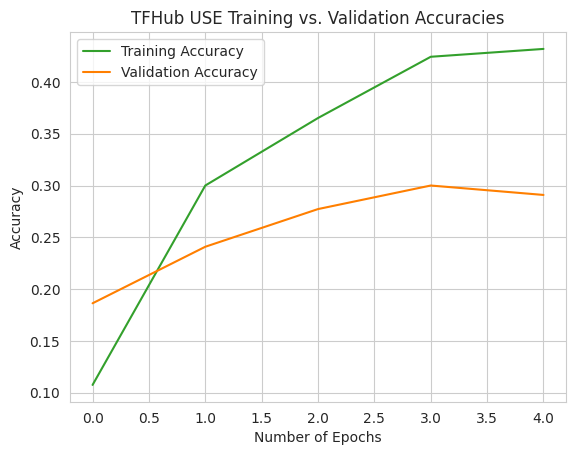

In [ ]:
plt.plot(model_6_history.history['accuracy'], label='Training Accuracy', color=palette[3])
plt.plot(model_6_history.history['val_accuracy'], label = 'Validation Accuracy', color=palette[7])
plt.title('TFHub USE Training vs. Validation Accuracies')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.legend();

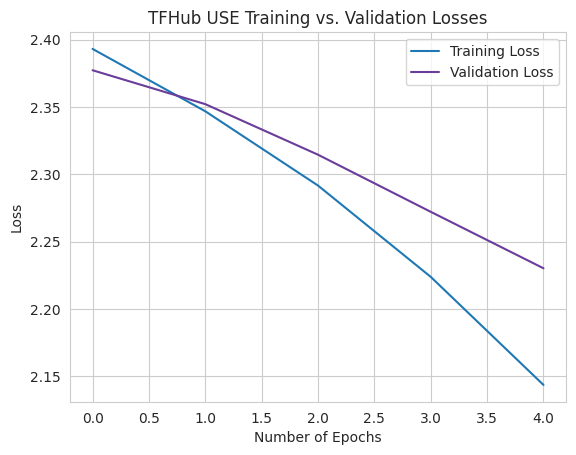

In [ ]:
plt.plot(model_6_history.history['loss'], label='Training Loss', color=palette[1])
plt.plot(model_6_history.history['val_loss'], label = 'Validation Loss', color=palette[9])
plt.title('TFHub USE Training vs. Validation Losses')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.legend();

In [ ]:
#Making predictions

model_6_pred_probs = model_6.predict(val_sentences)
model_6_pred_probs[:10]

7/7 [==============================] - 1s 20ms/step


array([[0.09330234, 0.07769537, 0.08032724, 0.07861667, 0.0789108 ,
        0.0676419 , 0.10535618, 0.06389566, 0.09168619, 0.14183079,
        0.12073683],
       [0.12726368, 0.10142094, 0.05698417, 0.07688981, 0.11824044,
        0.0725067 , 0.08165067, 0.08298527, 0.09074015, 0.09859402,
        0.09272408],
       [0.09511534, 0.09196894, 0.06532373, 0.09579358, 0.09161074,
        0.07072076, 0.11413073, 0.06033937, 0.0835912 , 0.10598693,
        0.12541868],
       [0.07920647, 0.06971974, 0.07310087, 0.10129946, 0.07393525,
        0.0615844 , 0.09183342, 0.16101444, 0.08875348, 0.09316875,
        0.10638376],
       [0.08138178, 0.10141075, 0.08100998, 0.07349631, 0.09886999,
        0.10060657, 0.09590657, 0.0696084 , 0.10844012, 0.10054182,
        0.08872776],
       [0.10166275, 0.10145278, 0.07853735, 0.08092083, 0.07731813,
        0.07889944, 0.09504227, 0.05632939, 0.11062239, 0.09991455,
        0.11930007],
       [0.07262362, 0.07961798, 0.08824886, 0.11383232, 0.

In [ ]:
#Turning prediction probabilities into 1D tensors

model_6_preds = tf.argmax(model_6_pred_probs, axis=1)
model_6_preds[:20]

<tf.Tensor: shape=(20,), dtype=int64, numpy=
array([ 9,  0, 10,  7,  8, 10, 10,  8,  6,  0,  1, 10, 10,  1, 10,  1,  3,
        1,  7,  6])>

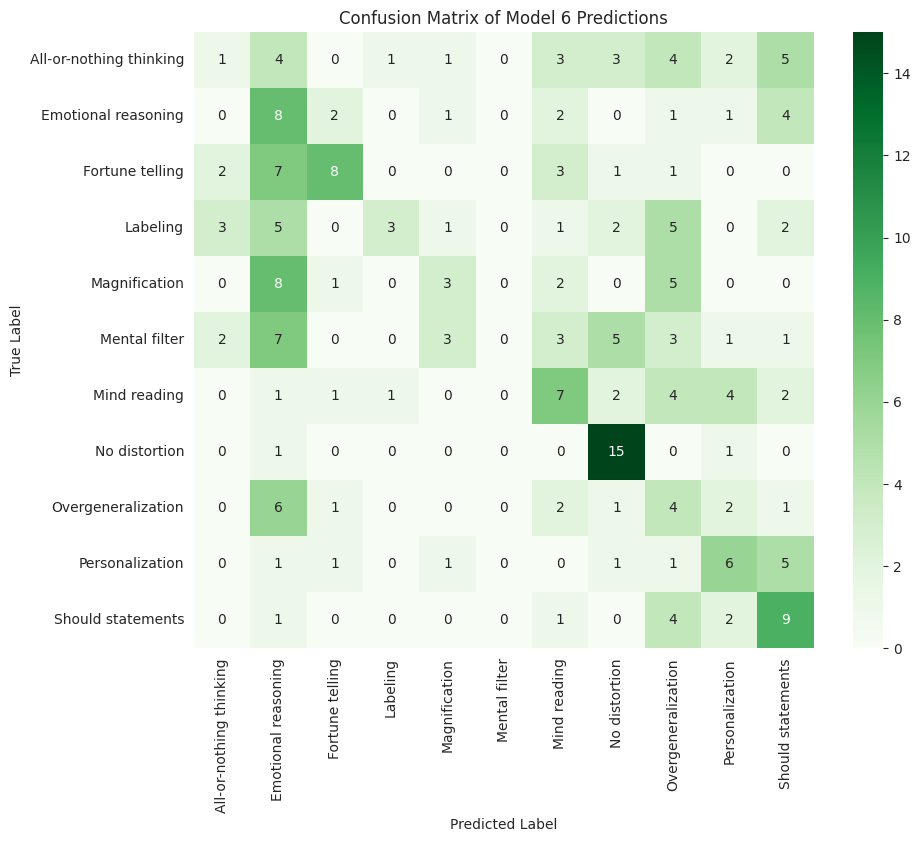

In [ ]:
from sklearn.metrics import confusion_matrix

categories = [code_to_category[i] for i in range(len(code_to_category))]

pred_labels = model_6_preds

conf_matrix = confusion_matrix(val_labels, pred_labels)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Greens", xticklabels=categories, yticklabels=categories)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of Model 6 Predictions');

In [ ]:
code_to_category

{0: 'All-or-nothing thinking',
 1: 'Emotional reasoning',
 2: 'Fortune telling',
 3: 'Labeling',
 4: 'Magnification',
 5: 'Mental filter',
 6: 'Mind reading',
 7: 'No distortion',
 8: 'Overgeneralization',
 9: 'Personalization',
 10: 'Should statements'}

In [ ]:
#Calculating evaluation metrics

model_6_results = calculate_results(y_true=val_labels, y_pred=model_6_preds)
model_6_results

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


{'accuracy': 29.09090909090909,
 'precision': 0.29519831682879394,
 'recall': 0.2909090909090909,
 'f1': 0.2592200172329958}

In [ ]:
compare_baseline_to_new_results(baseline_results, model_6_results)

Baseline accuracy: 27.27, New accuracy: 29.09, Difference: 1.82
Baseline precision: 0.25, New precision: 0.30, Difference: 0.04
Baseline recall: 0.27, New recall: 0.29, Difference: 0.02
Baseline f1: 0.25, New f1: 0.26, Difference: 0.01


###**Model 7: Transfer Learning - NNLM (Pretrained Encoder)**

In [ ]:
#Creating a sentence encoder layer in place of the usual vectorizer and embedding layers

nnlm_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/nnlm-en-dim50/2",
                                        input_shape=[],
                                        dtype=tf.string,
                                        trainable=True,
                                        name="NNLM")

In [ ]:
#Building the model

model_7 = tf.keras.Sequential(name="model_7_NNLM")
model_7.add(nnlm_encoder_layer) #Adding the sentence encoder layer
model_7.add(tf.keras.layers.Dense(64, activation='relu')) #Hidden dense layer 1
model_7.add(tf.keras.layers.Dense(11, activation='softmax')) #Output layer for the 11 classes

In [ ]:
model_7.compile(loss="sparse_categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
model_7.summary()

Model: "model_7_NNLM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 NNLM (KerasLayer)           (None, 50)                48190600  
                                                                 
 dense_6 (Dense)             (None, 64)                3264      
                                                                 
 dense_7 (Dense)             (None, 11)                715       
                                                                 
Total params: 48194579 (183.85 MB)
Trainable params: 48194579 (183.85 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model_7_history = model_7.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, "tf_hub_sentence_encoder_nnlm")])

Saving TensorBoard log files to: model_logs/tf_hub_sentence_encoder_nnlm/20241001-103547
Epoch 1/5
21/21 [==============================] - 34s 2s/step - loss: 2.3969 - accuracy: 0.0985 - val_loss: 2.3937 - val_accuracy: 0.1045
Epoch 2/5
21/21 [==============================] - 32s 2s/step - loss: 2.3231 - accuracy: 0.1833 - val_loss: 2.3781 - val_accuracy: 0.1091
Epoch 3/5
21/21 [==============================] - 32s 2s/step - loss: 2.2539 - accuracy: 0.2470 - val_loss: 2.3592 - val_accuracy: 0.1227
Epoch 4/5
21/21 [==============================] - 41s 2s/step - loss: 2.1748 - accuracy: 0.3576 - val_loss: 2.3331 - val_accuracy: 0.1591
Epoch 5/5
21/21 [==============================] - 32s 1s/step - loss: 2.0714 - accuracy: 0.4591 - val_loss: 2.3077 - val_accuracy: 0.1591


In [ ]:
#Evaluating the model on the validation data

model_7.evaluate(val_sentences, val_labels)

7/7 [==============================] - 1s 178ms/step - loss: 2.3077 - accuracy: 0.1591


[2.307720184326172, 0.15909090638160706]

**Visualizing loss and accuracy values**

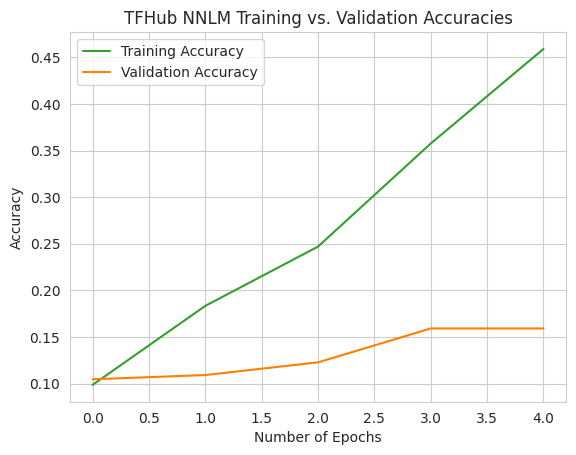

In [ ]:
plt.plot(model_7_history.history['accuracy'], label='Training Accuracy', color=palette[3])
plt.plot(model_7_history.history['val_accuracy'], label = 'Validation Accuracy', color=palette[7])
plt.title('TFHub NNLM Training vs. Validation Accuracies')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.legend();

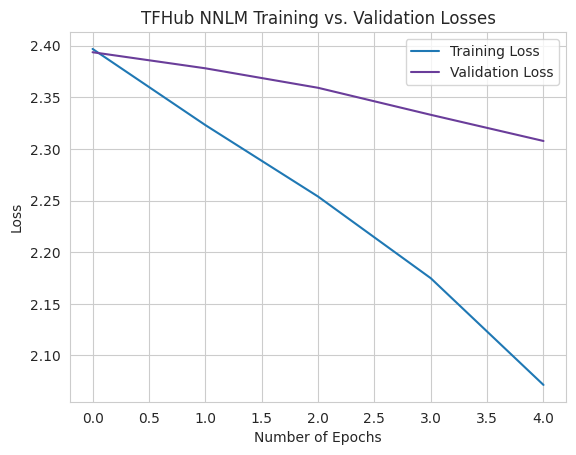

In [ ]:
plt.plot(model_7_history.history['loss'], label='Training Loss', color=palette[1])
plt.plot(model_7_history.history['val_loss'], label = 'Validation Loss', color=palette[9])
plt.title('TFHub NNLM Training vs. Validation Losses')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.legend();

In [ ]:
#Making predictions on the validation dataset

model_7_pred_probs = model_7.predict(val_sentences)
model_7_pred_probs.shape, model_7_pred_probs[:10]

7/7 [==============================] - 2s 281ms/step


((220, 11),
 array([[0.10550678, 0.1116911 , 0.07966979, 0.07191726, 0.0769054 ,
         0.09676656, 0.07665444, 0.08684037, 0.06922353, 0.10026835,
         0.12455658],
        [0.08873567, 0.0821488 , 0.07988181, 0.06474362, 0.09631546,
         0.07522506, 0.08988151, 0.12775686, 0.08358177, 0.11128473,
         0.1004447 ],
        [0.06906397, 0.08213776, 0.05865241, 0.07336938, 0.09876184,
         0.07698763, 0.12135082, 0.12381113, 0.11185998, 0.11365624,
         0.07034887],
        [0.05314426, 0.0567217 , 0.0796421 , 0.0609152 , 0.09486804,
         0.04783156, 0.12444808, 0.19948   , 0.13423605, 0.09407437,
         0.05463863],
        [0.08528735, 0.09668946, 0.09953911, 0.06676901, 0.09012363,
         0.08319066, 0.1165975 , 0.08507694, 0.08672567, 0.10291428,
         0.08708633],
        [0.08093315, 0.11294826, 0.07726927, 0.07810431, 0.08806931,
         0.08732197, 0.09375413, 0.06330857, 0.11750389, 0.10105399,
         0.09973327],
        [0.1092736 , 0.12174

In [ ]:
#Turning prediction probabilities into 1D tensors

model_7_preds = tf.argmax(model_7_pred_probs, axis=1)
model_7_preds[:20]

<tf.Tensor: shape=(20,), dtype=int64, numpy=
array([10,  7,  7,  7,  6,  8, 10,  7,  1, 10, 10, 10, 10,  9, 10,  7,  7,
        7,  7,  6])>

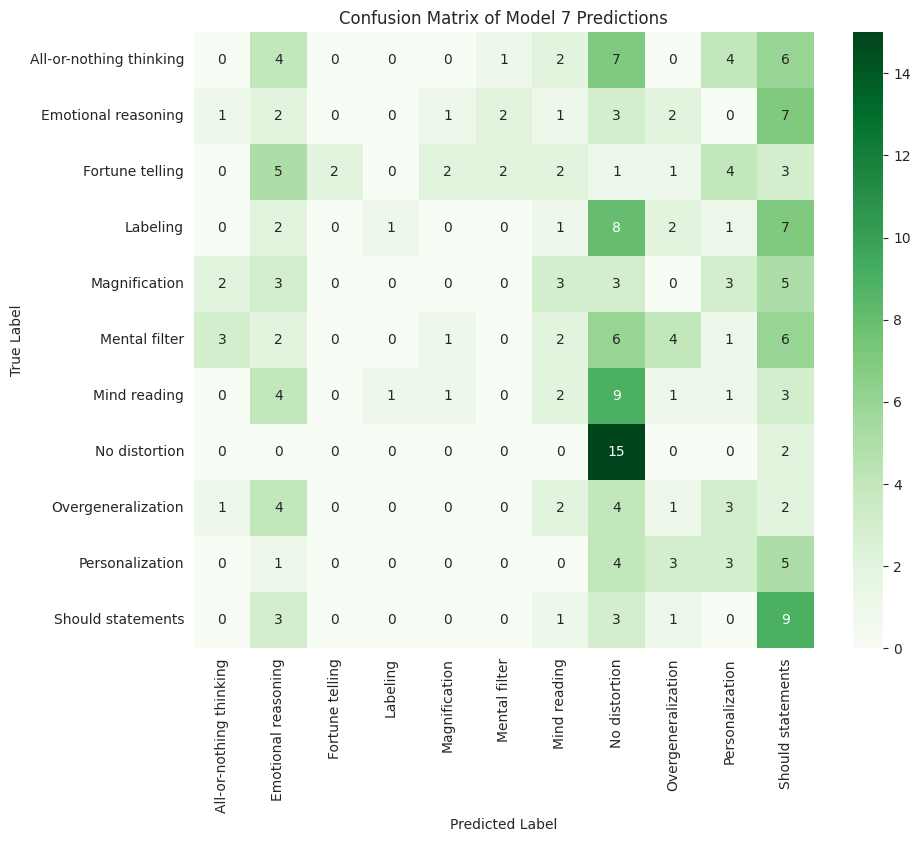

In [ ]:
from sklearn.metrics import confusion_matrix

categories = [code_to_category[i] for i in range(len(code_to_category))]

pred_labels = model_7_preds

conf_matrix = confusion_matrix(val_labels, pred_labels)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Greens", xticklabels=categories, yticklabels=categories)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of Model 7 Predictions');

In [ ]:
code_to_category

{0: 'All-or-nothing thinking',
 1: 'Emotional reasoning',
 2: 'Fortune telling',
 3: 'Labeling',
 4: 'Magnification',
 5: 'Mental filter',
 6: 'Mind reading',
 7: 'No distortion',
 8: 'Overgeneralization',
 9: 'Personalization',
 10: 'Should statements'}

In [ ]:
#Calculating LSTM model results

model_7_results = calculate_results(y_true=val_labels, y_pred=model_7_preds)
model_7_results

{'accuracy': 15.909090909090908,
 'precision': 0.21536107831562376,
 'recall': 0.1590909090909091,
 'f1': 0.10782262067506429}

In [ ]:
compare_baseline_to_new_results(baseline_results, model_7_results)

Baseline accuracy: 27.27, New accuracy: 15.91, Difference: -11.36
Baseline precision: 0.25, New precision: 0.22, Difference: -0.04
Baseline recall: 0.27, New recall: 0.16, Difference: -0.11
Baseline f1: 0.25, New f1: 0.11, Difference: -0.15


###**Comparing Metrics Across Various Models**

In [ ]:
data = {
    'Model': ['Baseline', 'Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5', 'Model 6', 'Model 7'],
    'Accuracy (%)': [27.27272727272727, 14.545454545454545, 17.727272727272727, 15.0, 21.818181818181817, 16.818181818181817, 29.09090909090909, 15.909090909090908],
    'Precision': [0.251969696969697, 0.03857987772461457, 0.17025358851674638, 0.12853535353535353, 0.15879715634606936, 0.15245508865867383, 0.29519831682879394, 0.21536107831562376],
    'Recall': [0.2727272727272727, 0.14545454545454545, 0.17727272727272728, 0.15, 0.21818181818181817, 0.16818181818181818, 0.2909090909090909, 0.1590909090909091],
    'F1-Score': [0.2537299213958921, 0.05655554169363243, 0.12503946938429697, 0.09025624338977235, 0.1740176254461969, 0.07721980076784506, 0.2592200172329958, 0.10782262067506429]
}

models_compare = pd.DataFrame(data)
models_compare

,Model,Accuracy (%),Precision,Recall,F1-Score
0,Baseline,27.272727,0.251970,0.272727,0.253730
1,Model 1,14.545455,0.038580,0.145455,0.056556
2,Model 2,17.727273,0.170254,0.177273,0.125039
3,Model 3,15.000000,0.128535,0.150000,0.090256
4,Model 4,21.818182,0.158797,0.218182,0.174018
5,Model 5,16.818182,0.152455,0.168182,0.077220
6,Model 6,29.090909,0.295198,0.290909,0.259220
7,Model 7,15.909091,0.215361,0.159091,0.107823


In [ ]:
models_compare.to_csv('models_compare.csv', index=False)

### **Improving the Best Performing Model: USE + Bidirectional-LSTM (Model 4 Improved)**

In [ ]:
# !pip install tensorflow==2.15.0 keras==2.15.0

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

In [ ]:
print(tf.__version__)
print(hub.__version__)

2.15.0
0.16.1


In [ ]:
#USE Layer

tf.random.set_seed(42)

use_encoder_layer = hub.KerasLayer(
    "https://tfhub.dev/google/universal-sentence-encoder/4",
    input_shape=[],
    dtype=tf.string,
    trainable=False,
    name="USE")

inputs = layers.Input(shape=(), dtype=tf.string)
x = use_encoder_layer(inputs)

x = layers.Reshape((1, -1))(x)  #Reshape for LSTM compatibility
# x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(x) #Stacking RNN layers requires return_sequences=True
x = layers.Bidirectional(layers.LSTM(128))(x)
x = layers.Dense(128, activation='relu')(x)

outputs = layers.Dense(11, activation='softmax', name="output")(x)

model_4_imp = tf.keras.Model(inputs=inputs, outputs=outputs, name="model_4_imp")

In [ ]:
model_4_imp.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

In [ ]:
model_4_imp.summary()

Model: "model_4_imp"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None,)]                 0         
                                                                 
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 reshape_2 (Reshape)         (None, 1, 512)            0         
                                                                 
 bidirectional_2 (Bidirecti  (None, 256)               656384    
 onal)                                                           
                                                                 
 dense_3 (Dense)             (None, 128)               32896     
                                                                 
 output (Dense)              (None, 11)                1419      
                                                       

In [ ]:
model_4_imp_history = model_4_imp.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, "tf_hub_use_imp")])

Saving TensorBoard log files to: model_logs/tf_hub_use_imp/20241003-091203
Epoch 1/5
21/21 [==============================] - 10s 107ms/step - loss: 2.3911 - accuracy: 0.1379 - val_loss: 2.3811 - val_accuracy: 0.2136
Epoch 2/5
21/21 [==============================] - 1s 35ms/step - loss: 2.3383 - accuracy: 0.3182 - val_loss: 2.3364 - val_accuracy: 0.2364
Epoch 3/5
21/21 [==============================] - 1s 38ms/step - loss: 2.2159 - accuracy: 0.3424 - val_loss: 2.2193 - val_accuracy: 0.2455
Epoch 4/5
21/21 [==============================] - 1s 36ms/step - loss: 2.0029 - accuracy: 0.4030 - val_loss: 2.0879 - val_accuracy: 0.2818
Epoch 5/5
21/21 [==============================] - 1s 61ms/step - loss: 1.7725 - accuracy: 0.4515 - val_loss: 1.9827 - val_accuracy: 0.3091


In [ ]:
#Evaluating the model on the validation data

model_4_imp.evaluate(val_sentences, val_labels)

7/7 [==============================] - 0s 21ms/step - loss: 1.9827 - accuracy: 0.3091


[1.9827489852905273, 0.30909091234207153]

I managed to build a model that achieves a slightly higher accuracy by combining the best approaches learned from the various experiments, achieving a test accuracy of **~30%**.

**Visualizing loss and accuracy values**

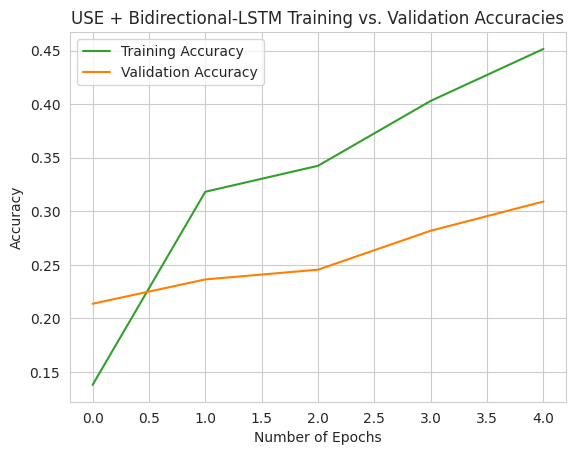

In [ ]:
plt.plot(model_4_imp_history.history['accuracy'], label='Training Accuracy', color=palette[3])
plt.plot(model_4_imp_history.history['val_accuracy'], label = 'Validation Accuracy', color=palette[7])
plt.title('USE + Bidirectional-LSTM Training vs. Validation Accuracies')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.legend();

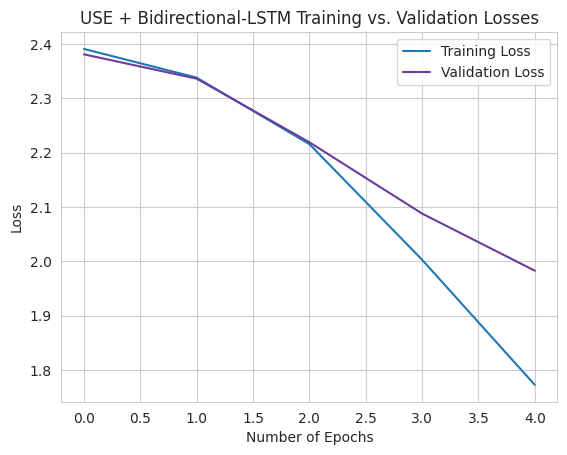

In [ ]:
plt.plot(model_4_imp_history.history['loss'], label='Training Loss', color=palette[1])
plt.plot(model_4_imp_history.history['val_loss'], label = 'Validation Loss', color=palette[9])
plt.title('USE + Bidirectional-LSTM Training vs. Validation Losses')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.legend();

In [ ]:
#Making predictions on the validation data

model_4_imp_pred_probs = model_4_imp.predict(val_sentences)
model_4_imp_pred_probs[:10]

7/7 [==============================] - 6s 38ms/step


array([[0.05032774, 0.05065998, 0.06933954, 0.07339226, 0.03035815,
        0.03892149, 0.06976217, 0.00181601, 0.05218004, 0.33518925,
        0.22805335],
       [0.24065264, 0.11066642, 0.02717961, 0.05833394, 0.21368726,
        0.09904787, 0.02306656, 0.04289639, 0.06398764, 0.05362332,
        0.06685831],
       [0.12657301, 0.06677607, 0.06218213, 0.11711057, 0.08768072,
        0.06717731, 0.10137536, 0.01454207, 0.07477289, 0.11275706,
        0.16905282],
       [0.09649249, 0.02664541, 0.04023611, 0.15811178, 0.0515472 ,
        0.05975742, 0.03250993, 0.3160261 , 0.06936838, 0.08916636,
        0.06013886],
       [0.08069197, 0.10280663, 0.11869469, 0.07799926, 0.0903012 ,
        0.11997638, 0.08426505, 0.01020728, 0.10138348, 0.10978042,
        0.1038936 ],
       [0.070887  , 0.0998961 , 0.05837229, 0.1130666 , 0.04677826,
        0.04089017, 0.09202676, 0.0090917 , 0.10737863, 0.13393696,
        0.22767545],
       [0.03472894, 0.04308428, 0.07597974, 0.15510659, 0.

In [ ]:
#Turning prediction probabilities into 1D tensors

model_4_imp_preds = tf.argmax(model_4_imp_pred_probs, axis=1)
model_4_imp_preds[:20]

<tf.Tensor: shape=(20,), dtype=int64, numpy=
array([ 9,  0, 10,  7,  5, 10, 10,  3,  9,  0,  1,  0, 10,  1, 10,  1,  3,
        8,  7,  6])>

**Confusion matrix of true labels and predictions**

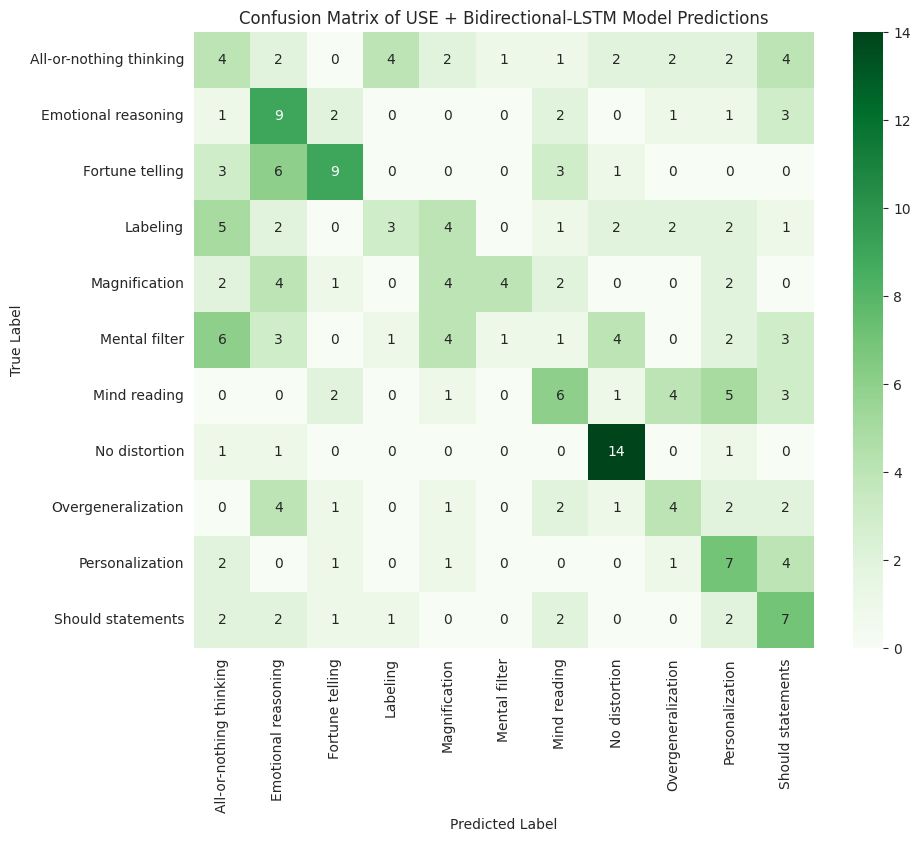

In [ ]:
from sklearn.metrics import confusion_matrix

categories = [code_to_category[i] for i in range(len(code_to_category))]

pred_labels = model_4_imp_preds

conf_matrix = confusion_matrix(val_labels, pred_labels)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Greens", xticklabels=categories, yticklabels=categories)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of USE + Bidirectional-LSTM Model Predictions');

In [ ]:
code_to_category

{0: 'All-or-nothing thinking',
 1: 'Emotional reasoning',
 2: 'Fortune telling',
 3: 'Labeling',
 4: 'Magnification',
 5: 'Mental filter',
 6: 'Mind reading',
 7: 'No distortion',
 8: 'Overgeneralization',
 9: 'Personalization',
 10: 'Should statements'}

In [ ]:
#Calculating model results

model_4_imp_results = calculate_results(val_labels, model_4_imp_preds)
model_4_imp_results

{'accuracy': 30.909090909090907,
 'precision': 0.300836434114509,
 'recall': 0.3090909090909091,
 'f1': 0.2882387628663288}

In [ ]:
compare_baseline_to_new_results(baseline_results, model_4_imp_results)

Baseline accuracy: 27.27, New accuracy: 30.91, Difference: 3.64
Baseline precision: 0.25, New precision: 0.30, Difference: 0.05
Baseline recall: 0.27, New recall: 0.31, Difference: 0.04
Baseline f1: 0.25, New f1: 0.29, Difference: 0.03


## **Saving the model**

In [ ]:
model_4_imp.save("model_4_imp.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Load model with custom Hub Layer (required with HDF5 format)
loaded_model_4_imp = tf.keras.models.load_model("model_4_imp.h5", custom_objects={"KerasLayer": hub.KerasLayer})

**Evaluating the model on the validation data**

In [ ]:
# How does our loaded model perform?
loaded_model_4_imp.evaluate(val_sentences, val_labels)

7/7 [==============================] - 2s 22ms/step - loss: 1.9827 - accuracy: 0.3091


[1.9827489852905273, 0.30909091234207153]

**Evaluating the model on the test data**

In [ ]:
loaded_model_4_imp.evaluate(test_sentences, test_labels)

7/7 [==============================] - 1s 65ms/step - loss: 2.0068 - accuracy: 0.2864


[2.006843090057373, 0.2863636314868927]